In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
rta=pd.read_csv("C:\Jahir\TMLC MGP Aug 2023\P1\RTA_Dataset.csv")

In [3]:
rta.shape

(12316, 32)

In [4]:
rta.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
rta.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
rta.rename(columns=col_map, inplace=True)

In [7]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [8]:
rta.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
rta.describe(include='object').T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [10]:
rta["driver_age"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

18-30       34.7%
31-50       33.2%
Over 51     12.9%
Unknown     12.6%
Under 18     6.7%
Name: driver_age, dtype: object

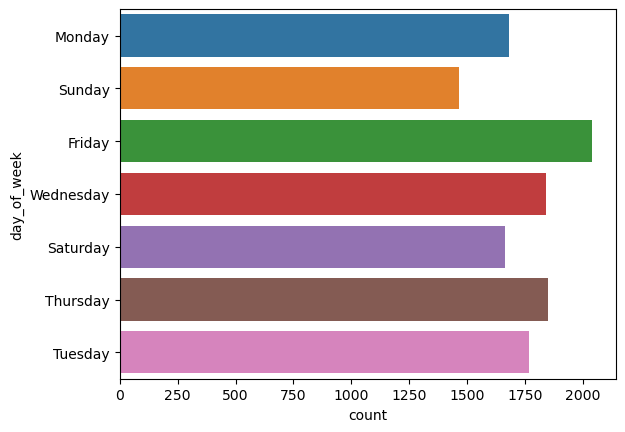

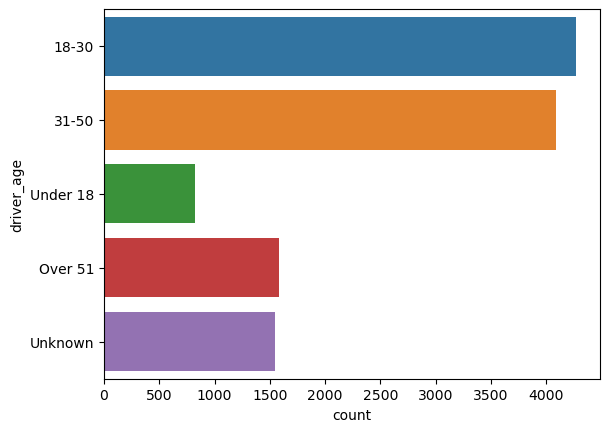

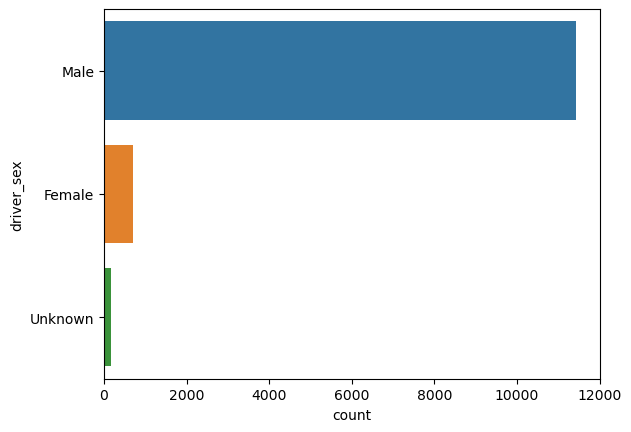

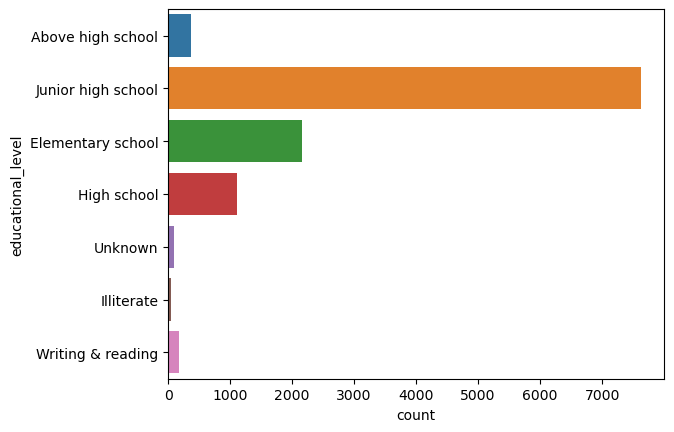

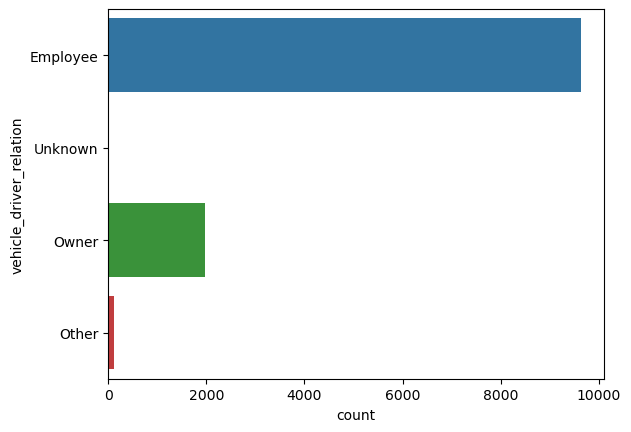

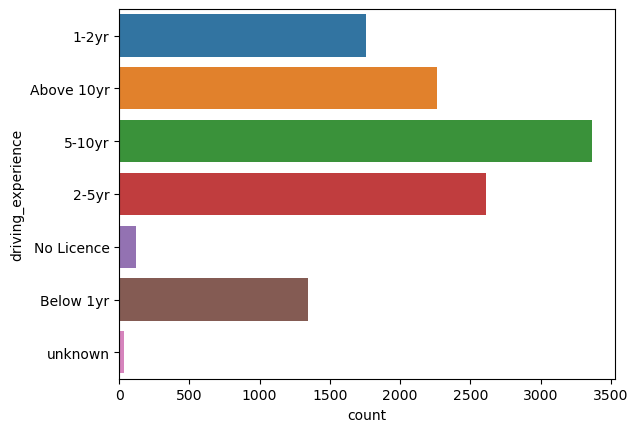

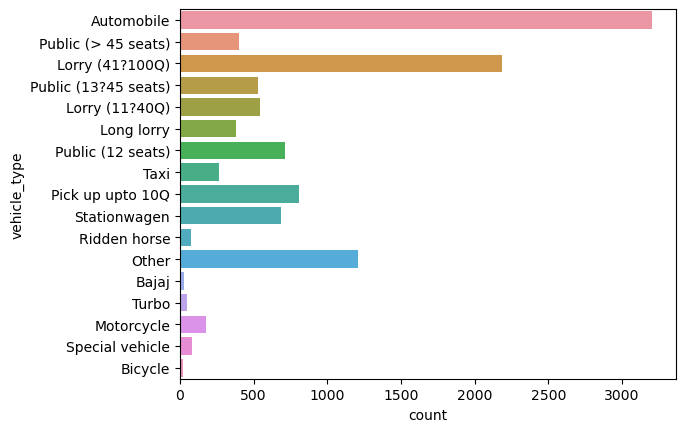

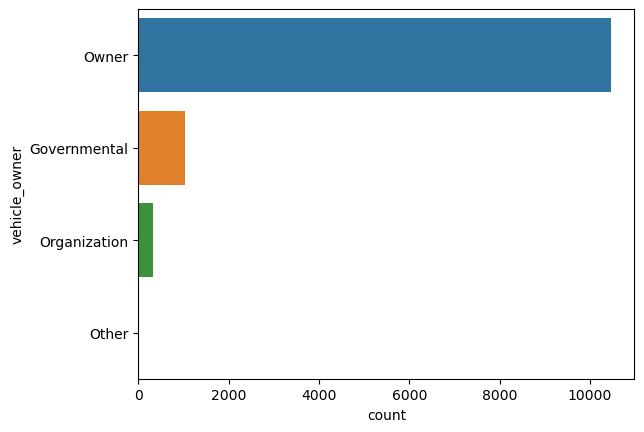

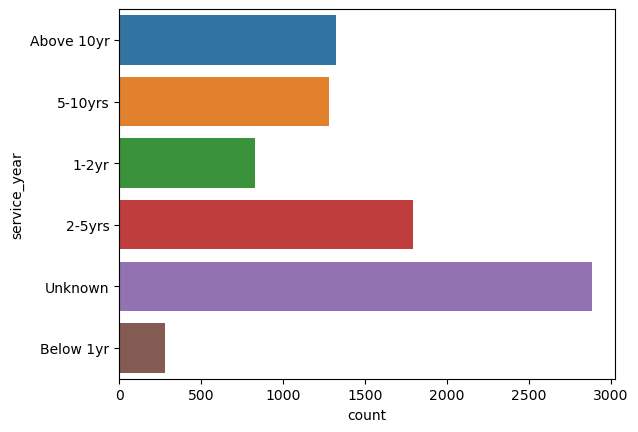

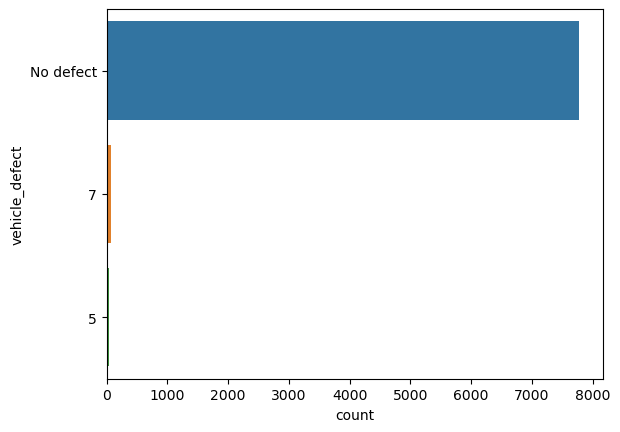

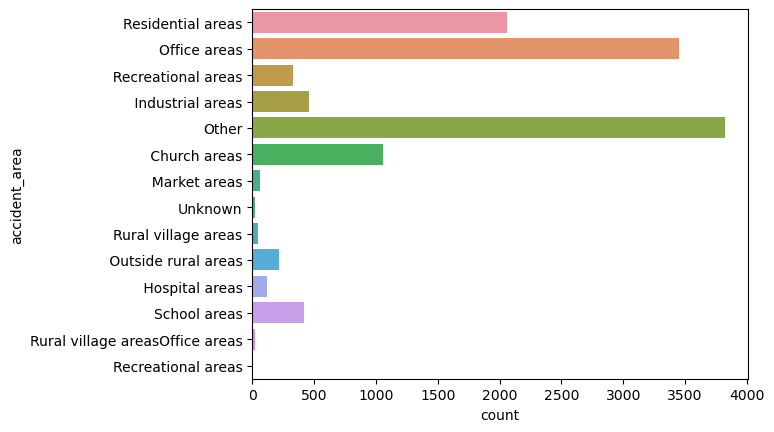

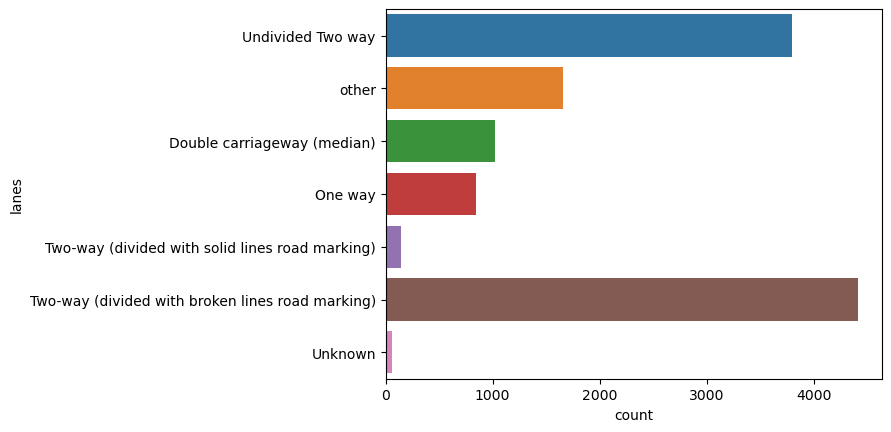

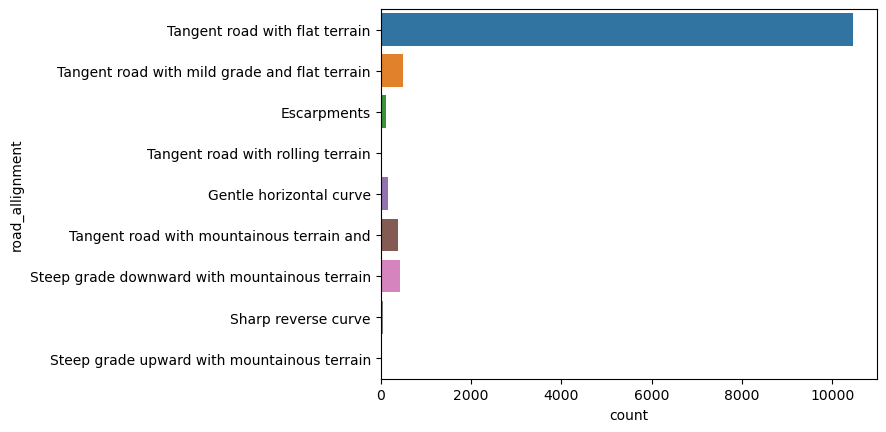

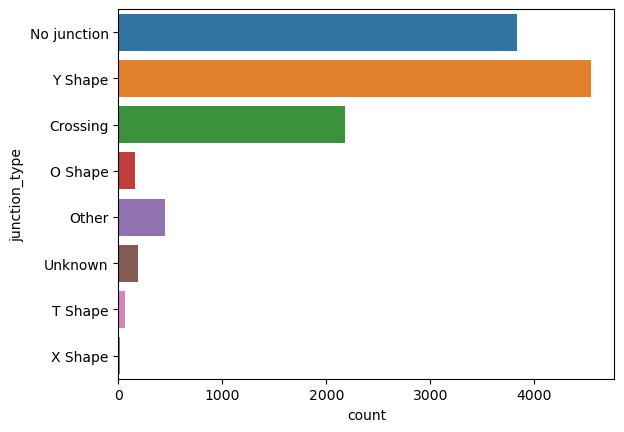

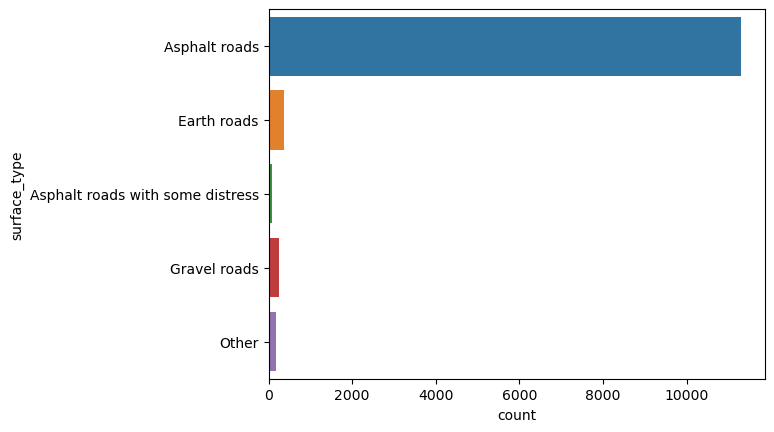

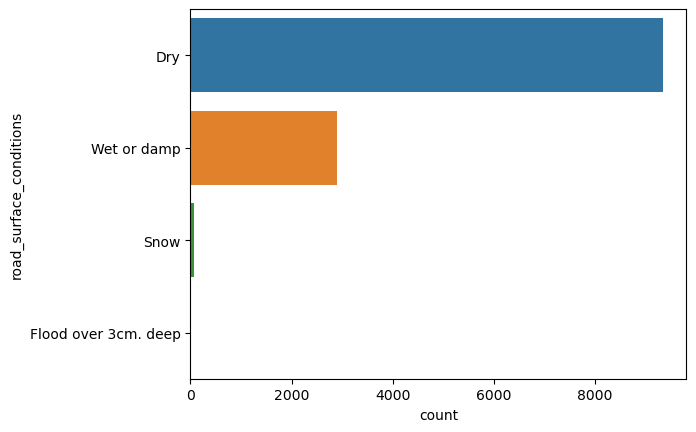

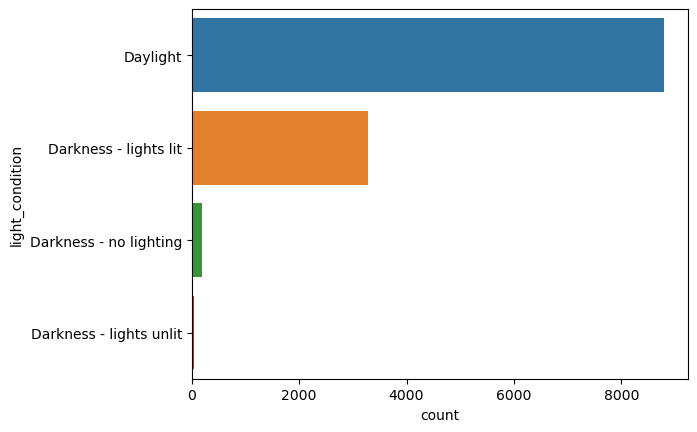

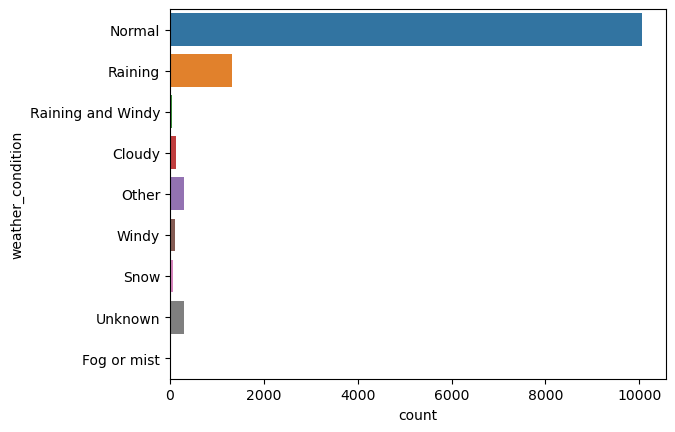

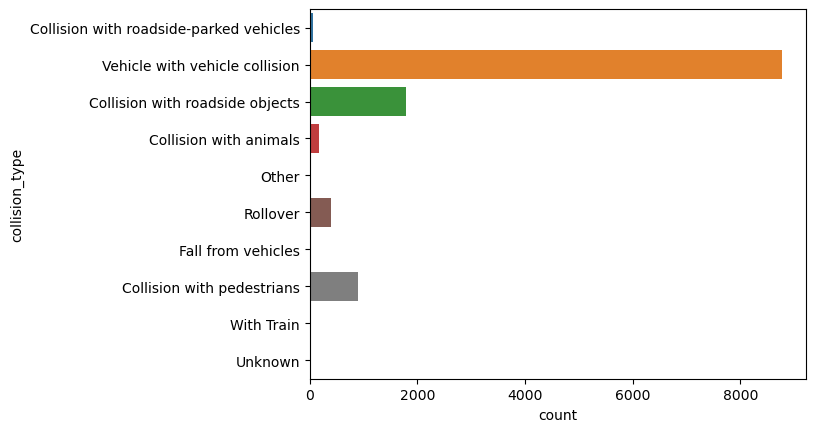

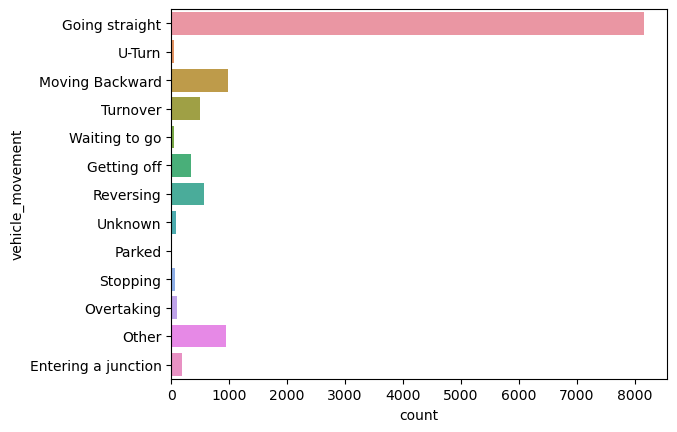

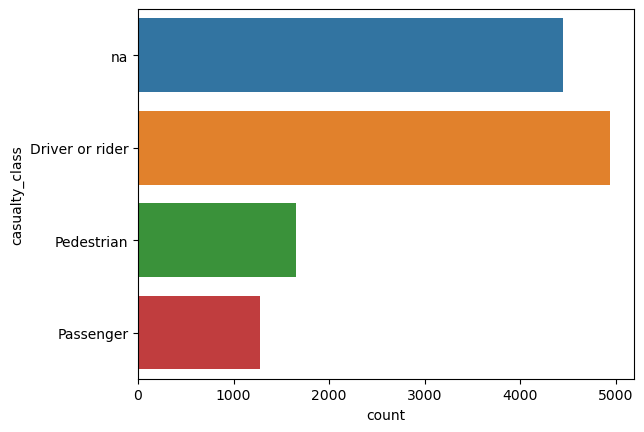

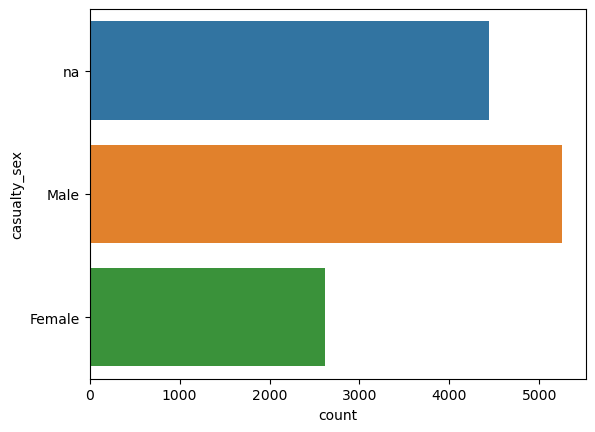

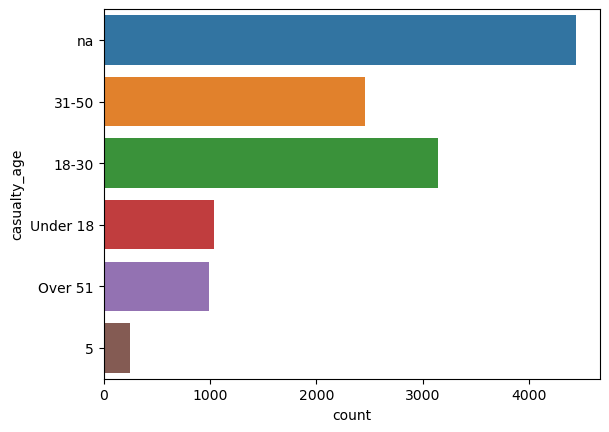

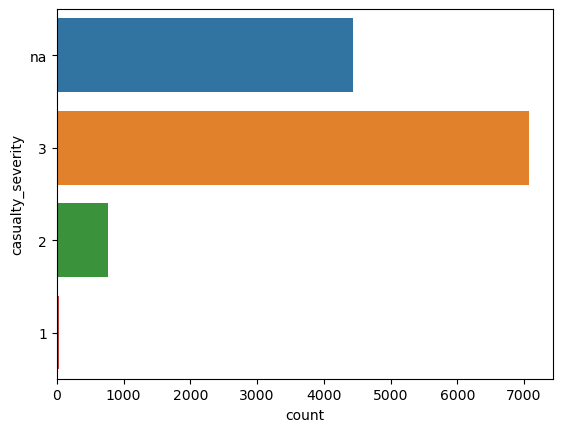

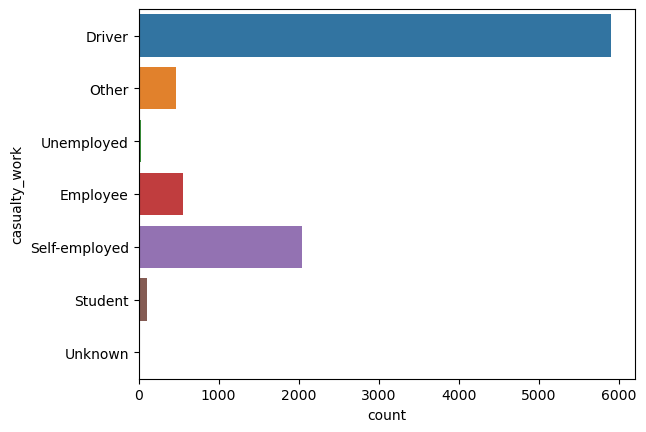

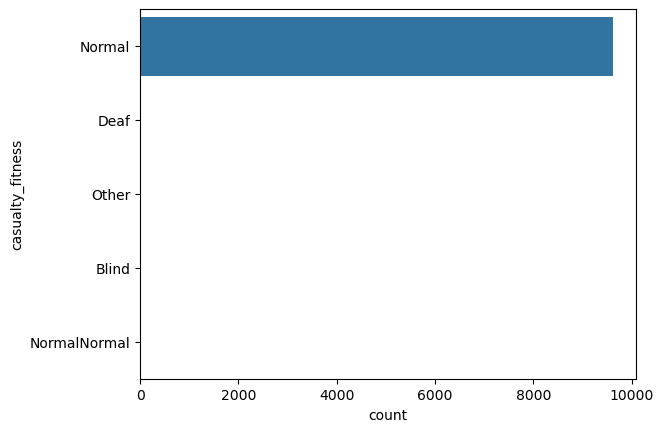

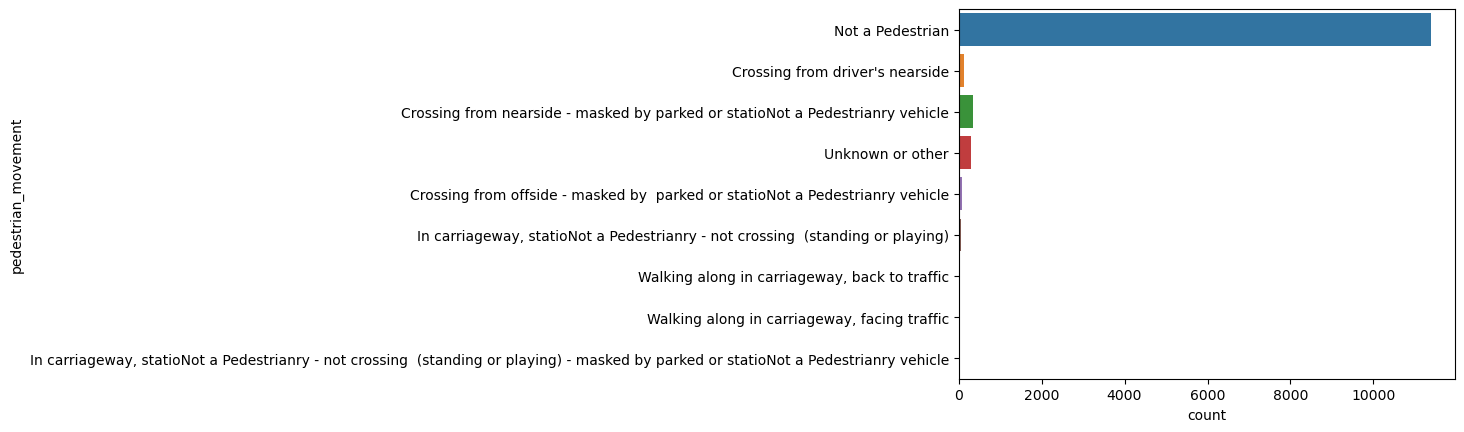

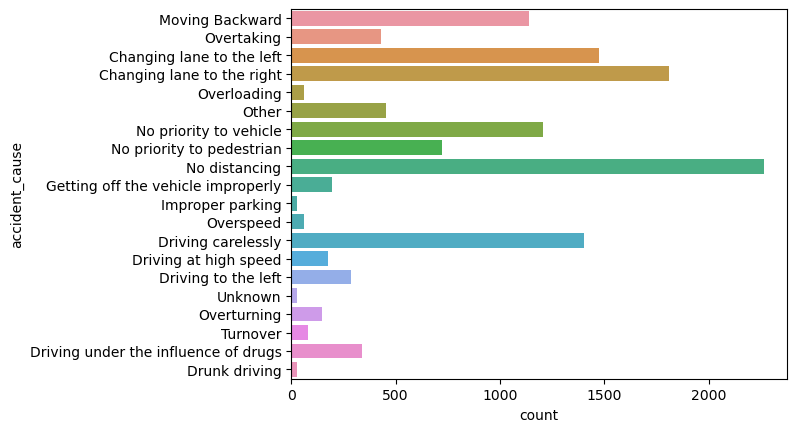

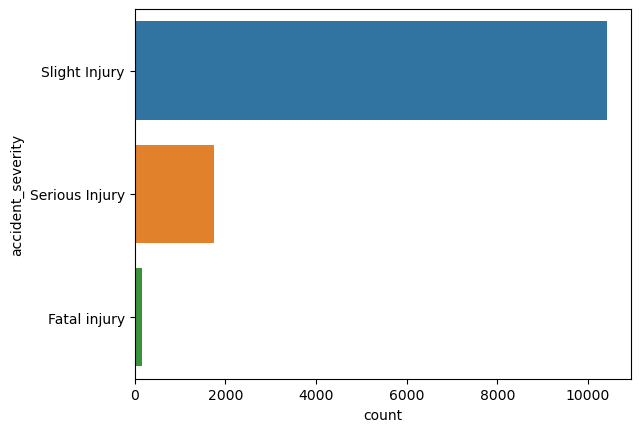

In [11]:
for col in rta.select_dtypes(include='object'):
    if rta[col].nunique() <= 20:
        sns.countplot(y=col, data=rta)
        plt.show()

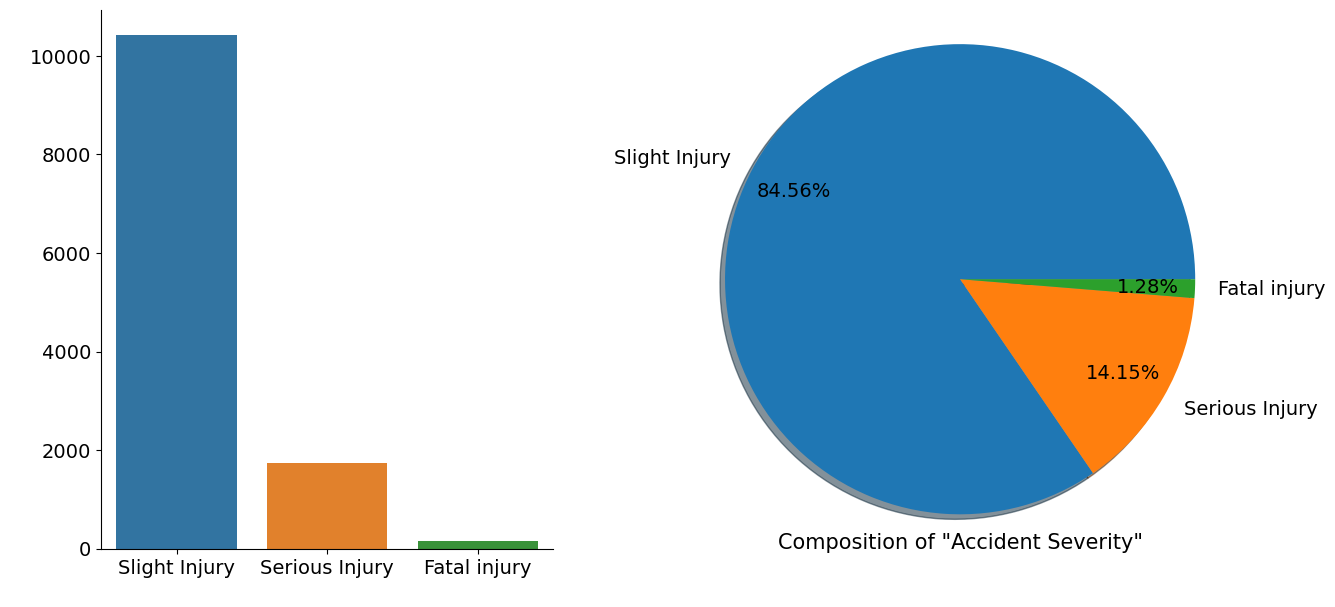

In [12]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=rta["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(rta["accident_severity"].value_counts(),
        labels=list(rta["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [13]:
columns=list(rta)
columns
#for i in columns:
    #df=rta[columns].value_counts()
    #print (df)
    

['time',
 'day_of_week',
 'driver_age',
 'driver_sex',
 'educational_level',
 'vehicle_driver_relation',
 'driving_experience',
 'vehicle_type',
 'vehicle_owner',
 'service_year',
 'vehicle_defect',
 'accident_area',
 'lanes',
 'road_allignment',
 'junction_type',
 'surface_type',
 'road_surface_conditions',
 'light_condition',
 'weather_condition',
 'collision_type',
 'vehicles_involved',
 'casualties',
 'vehicle_movement',
 'casualty_class',
 'casualty_sex',
 'casualty_age',
 'casualty_severity',
 'casualty_work',
 'casualty_fitness',
 'pedestrian_movement',
 'accident_cause',
 'accident_severity']

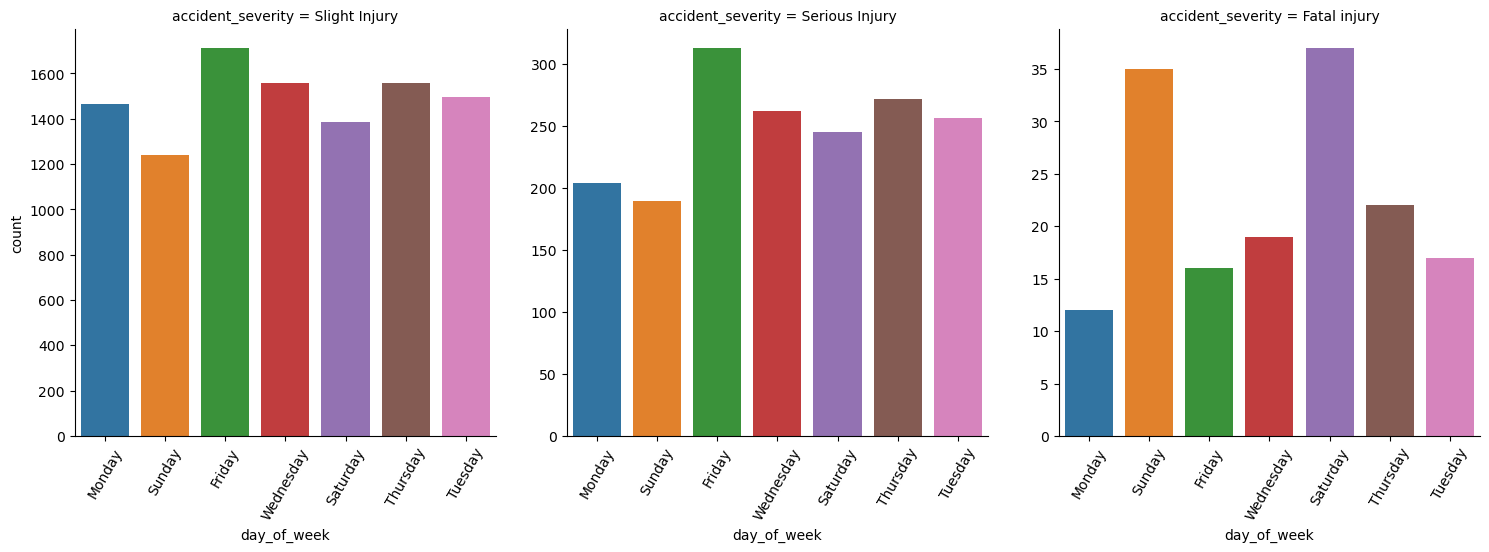

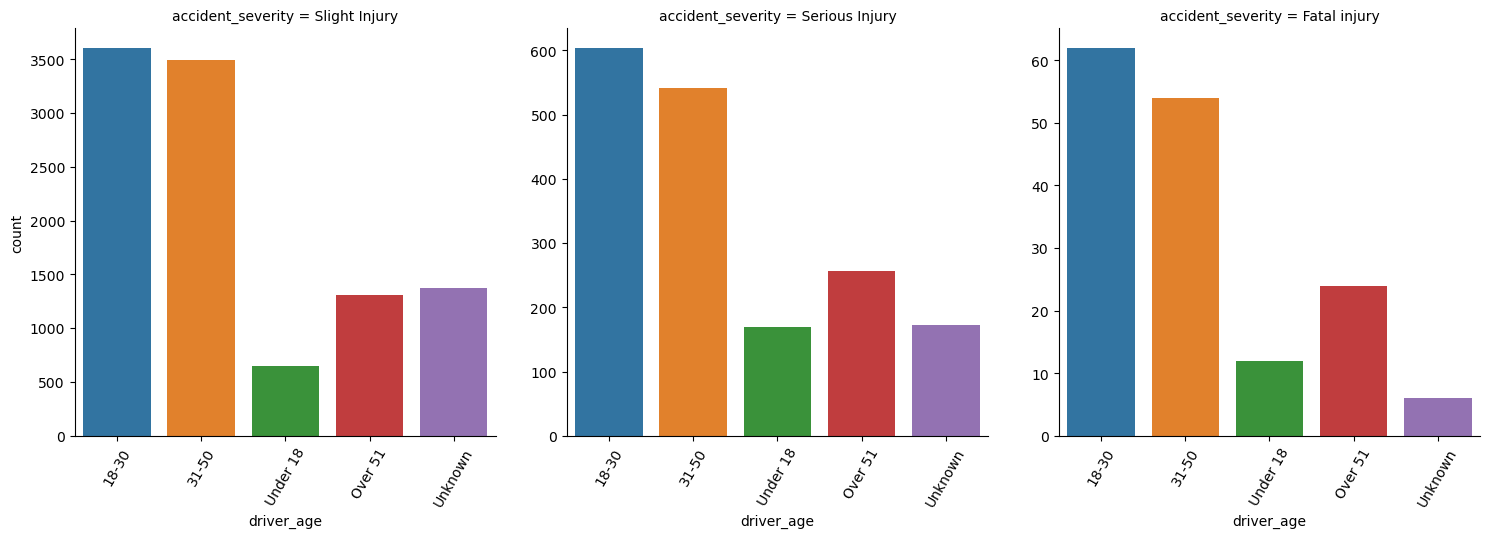

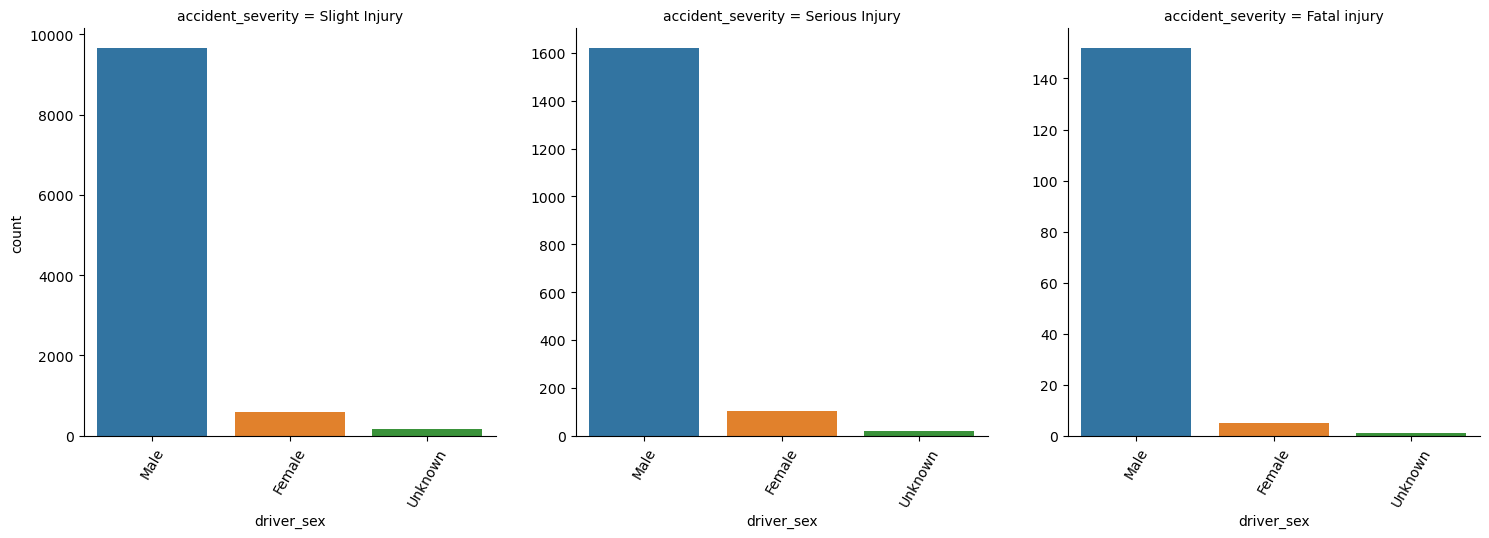

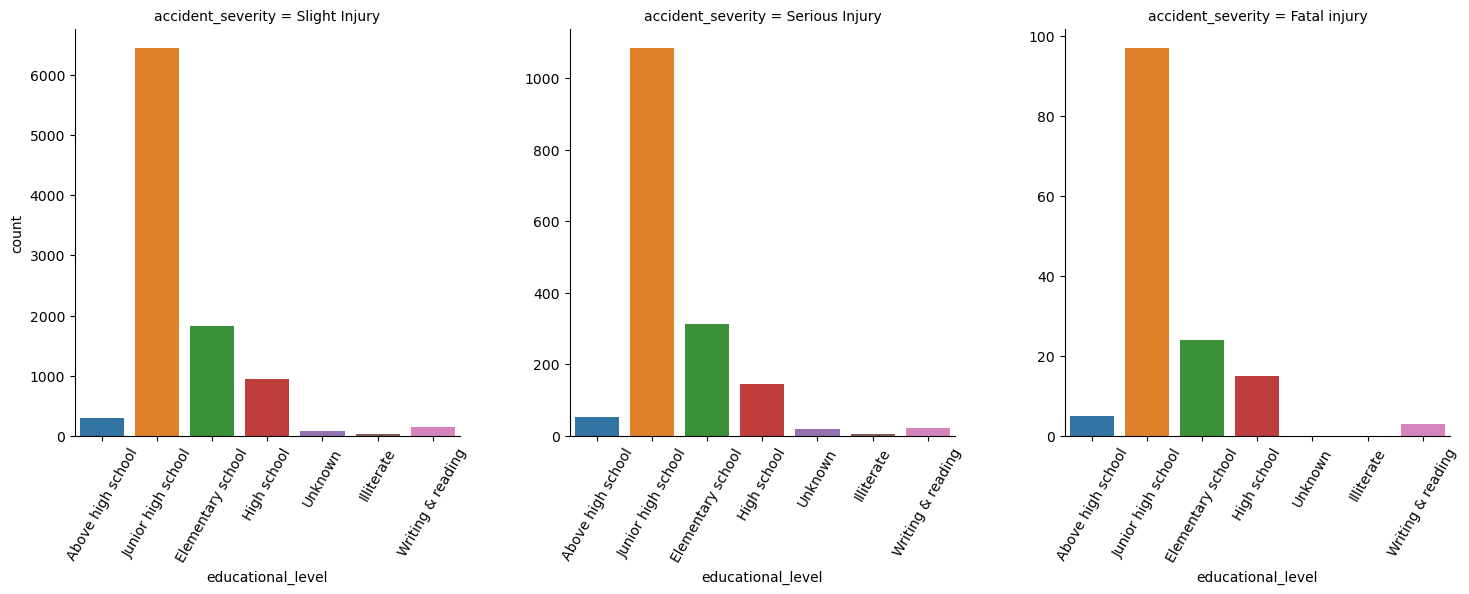

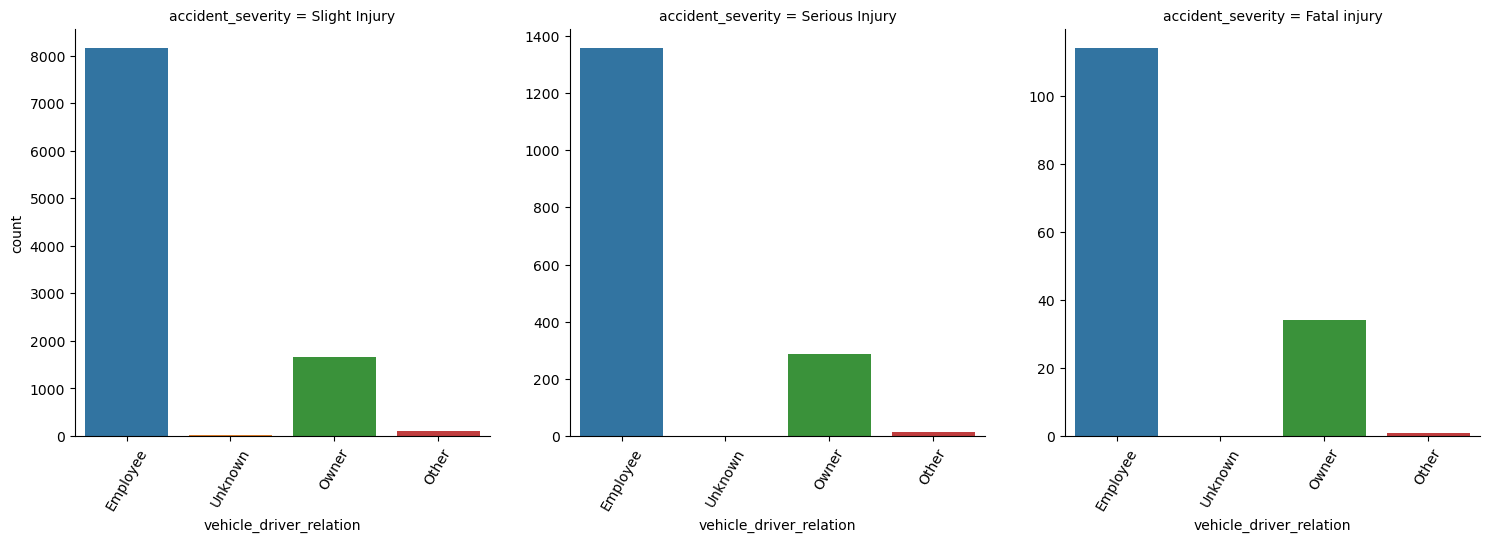

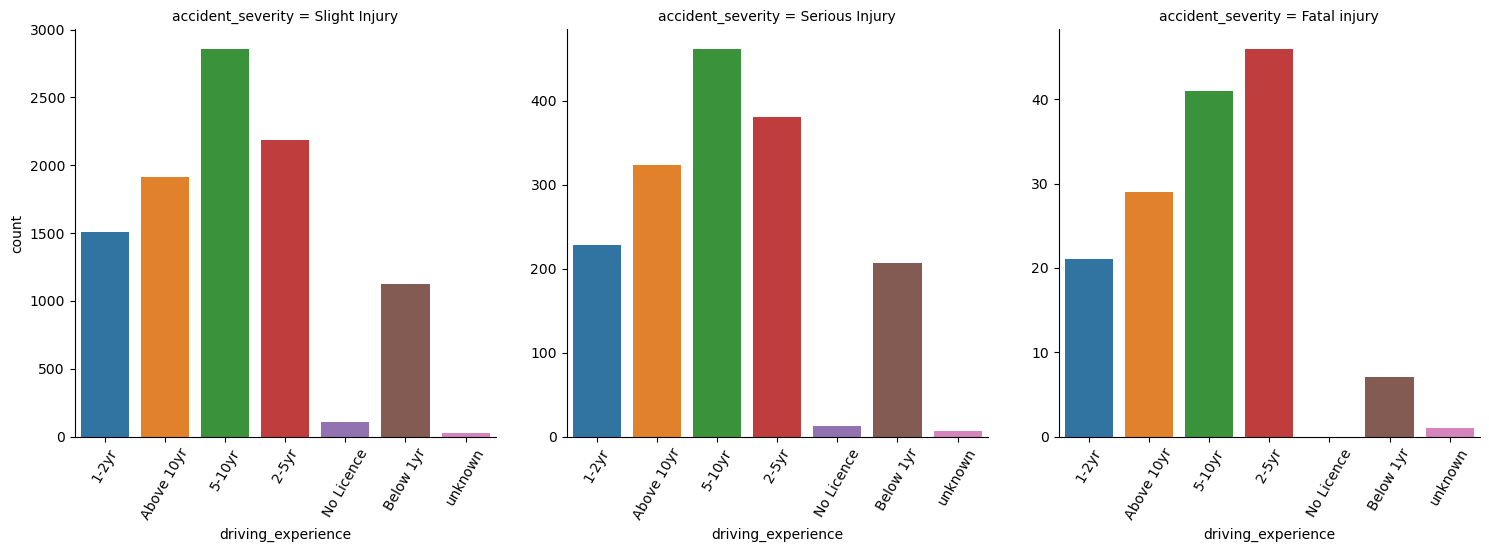

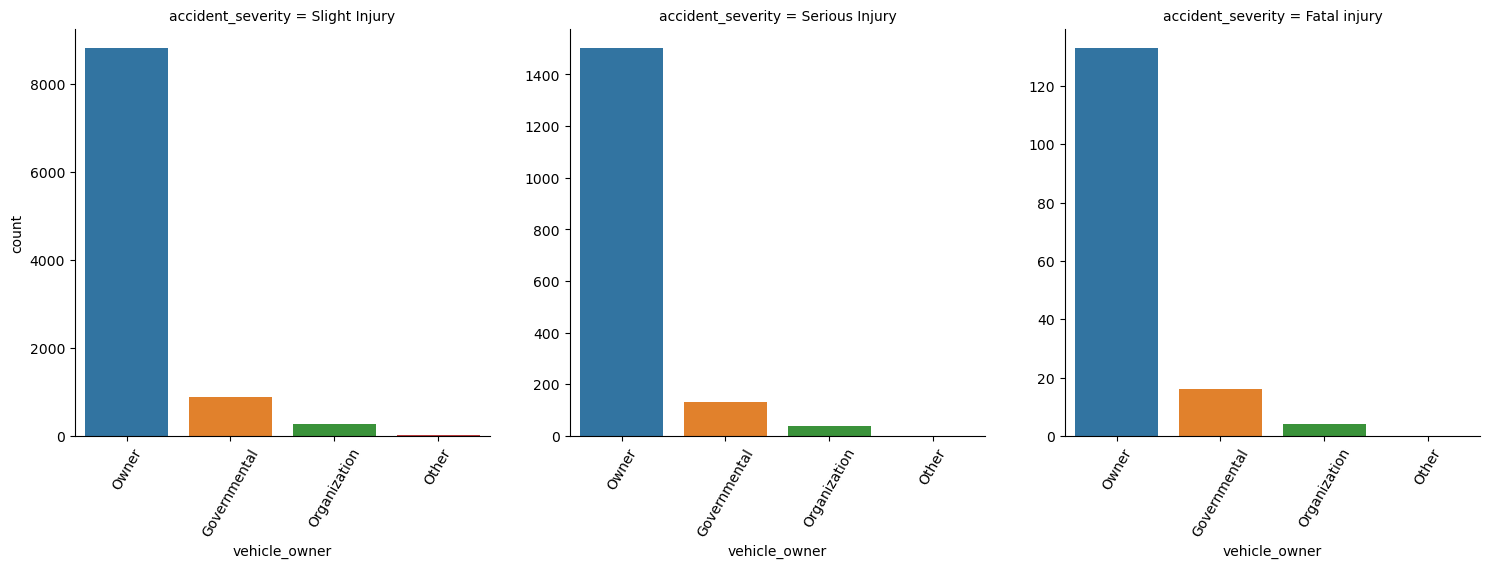

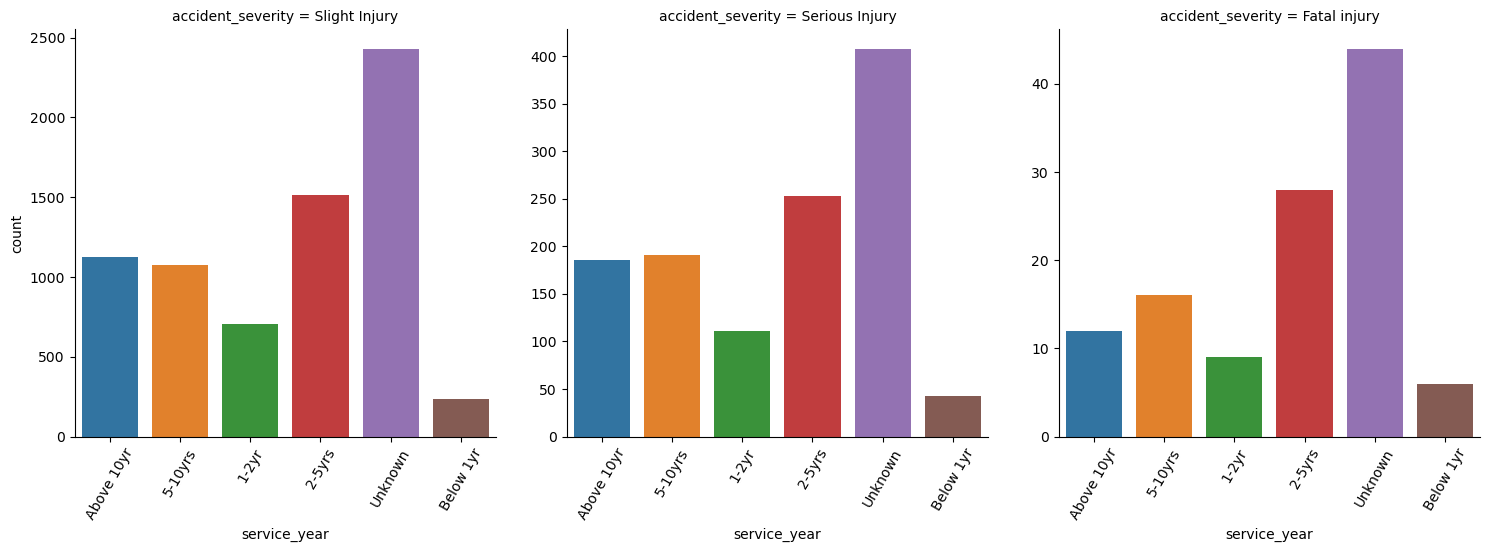

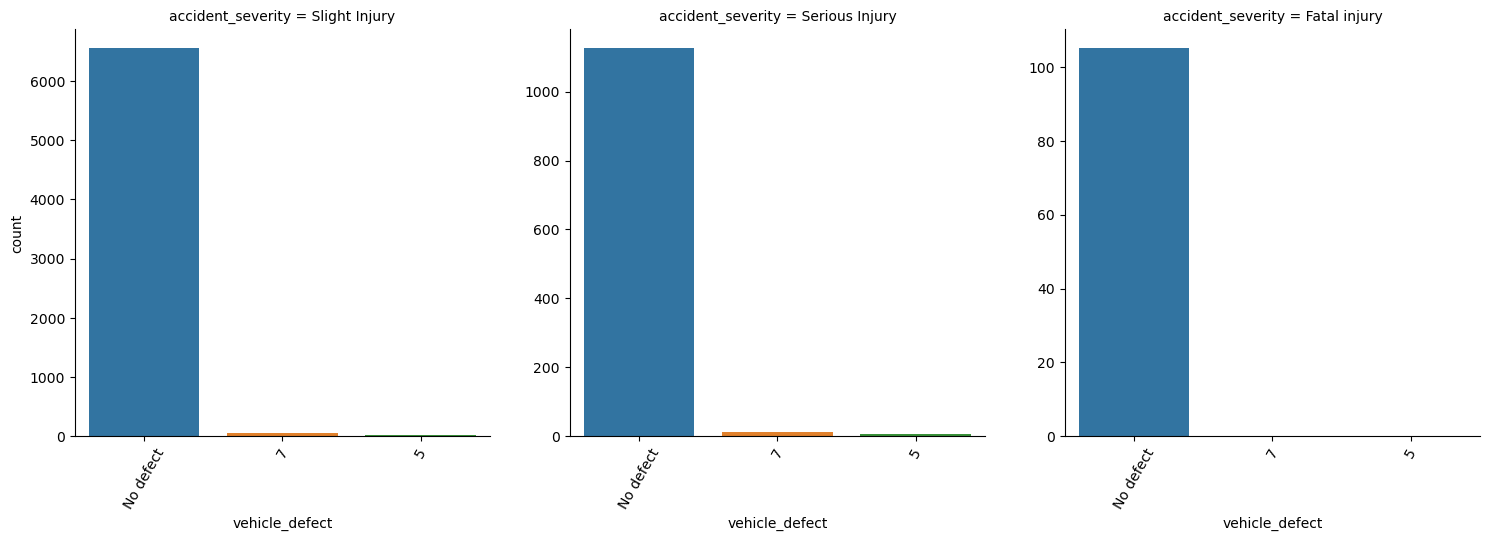

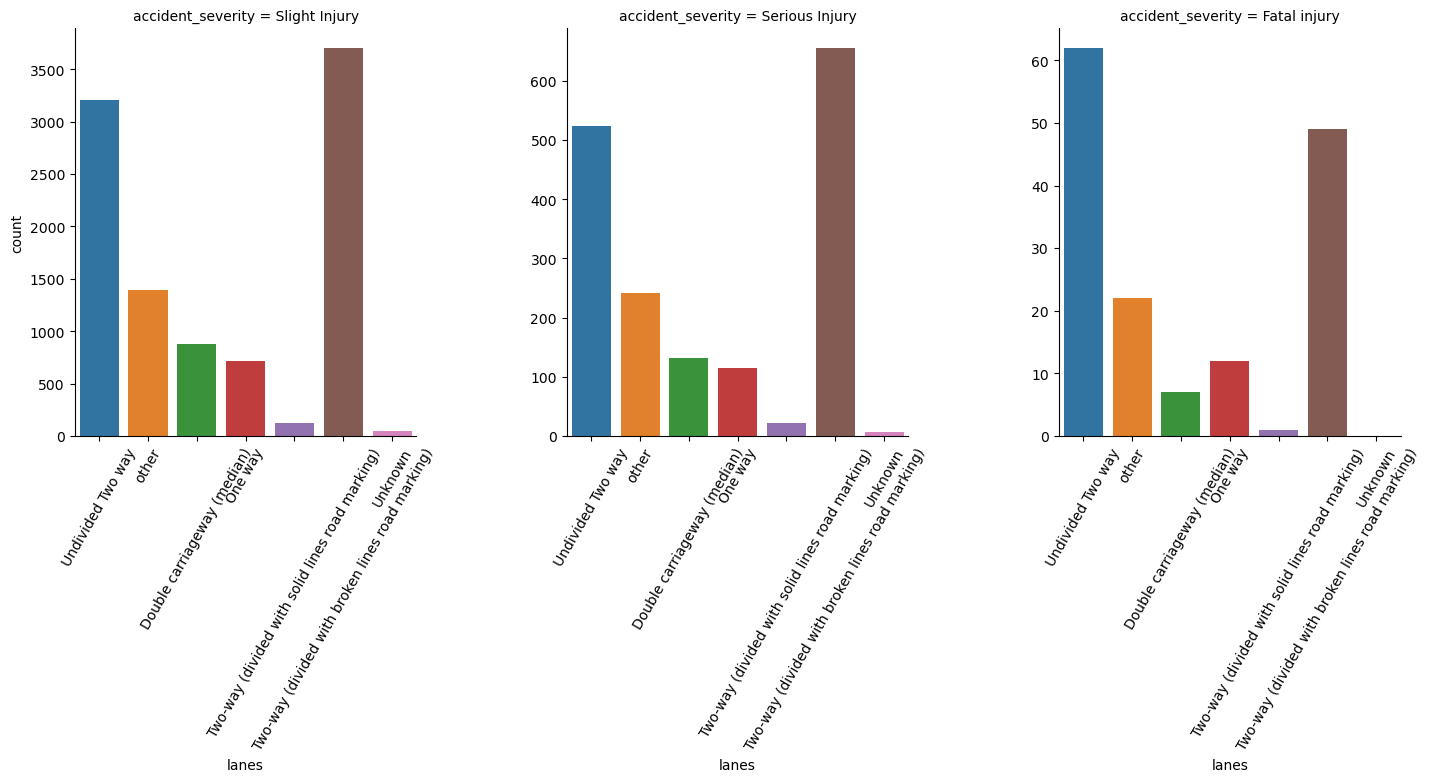

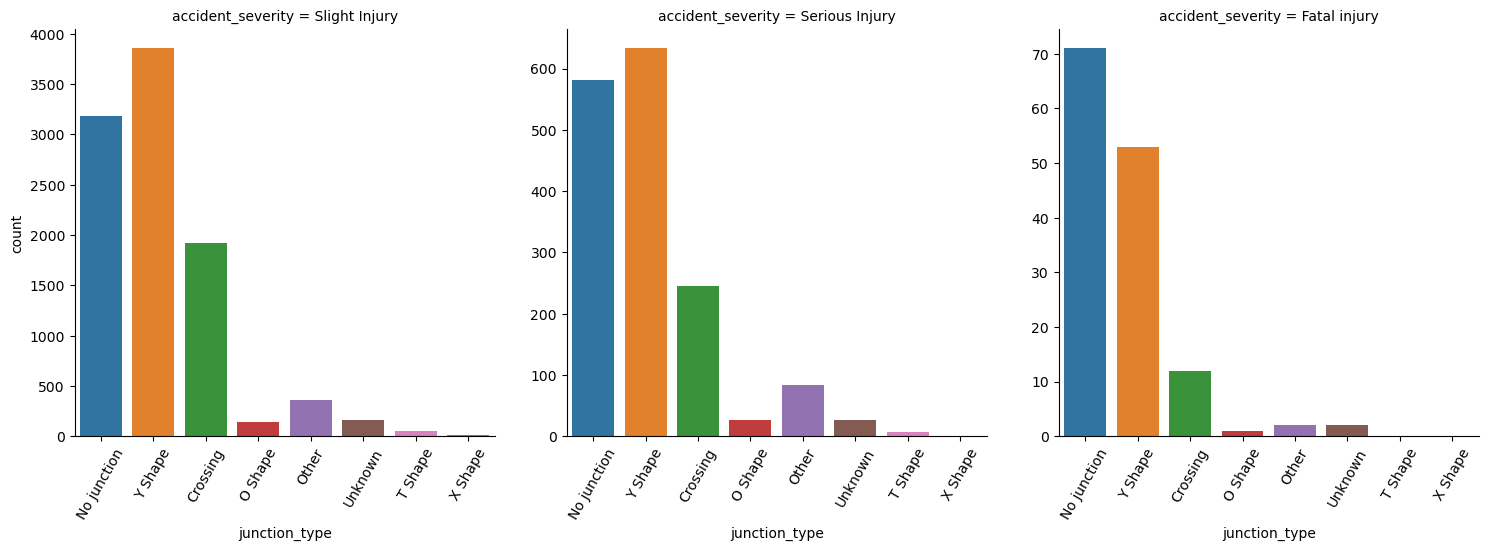

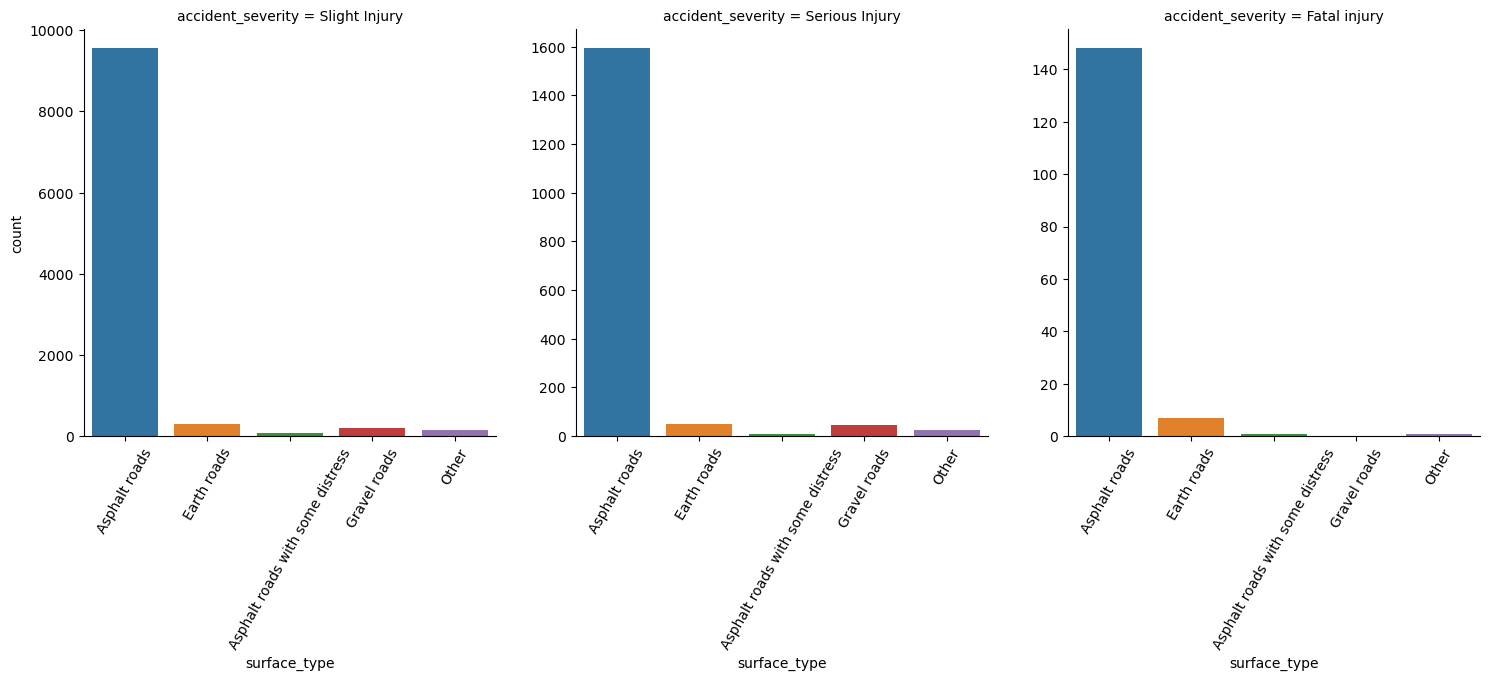

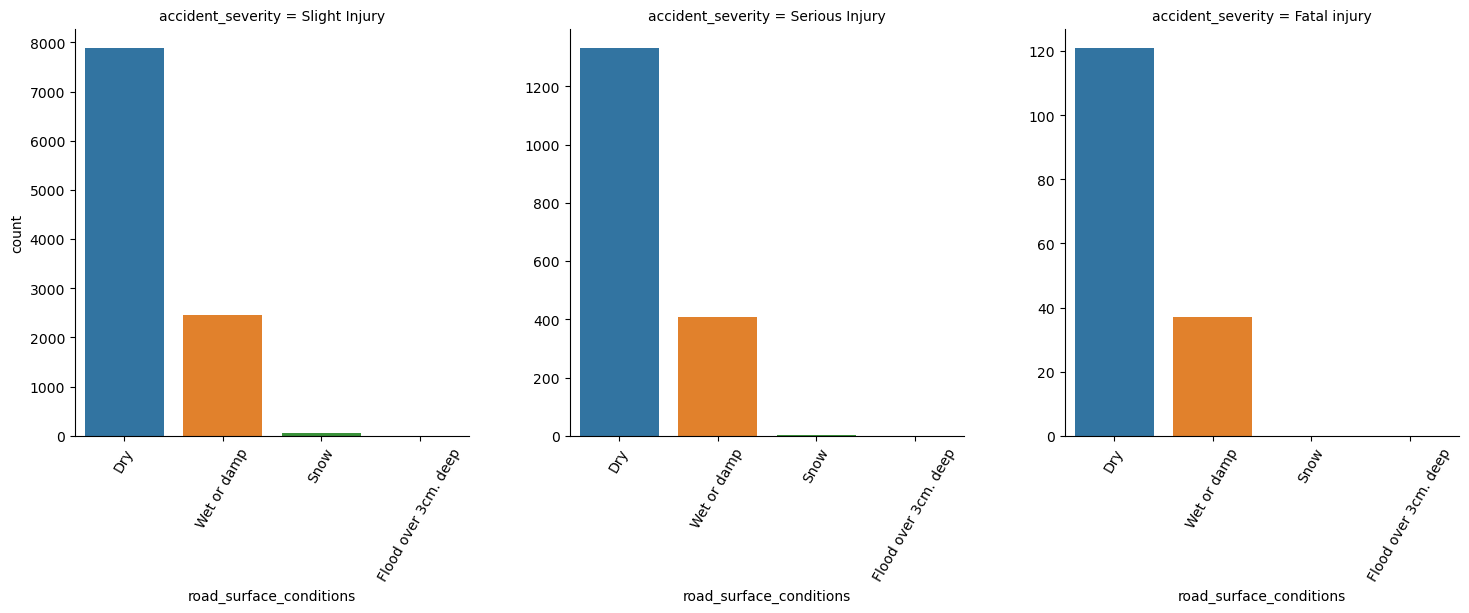

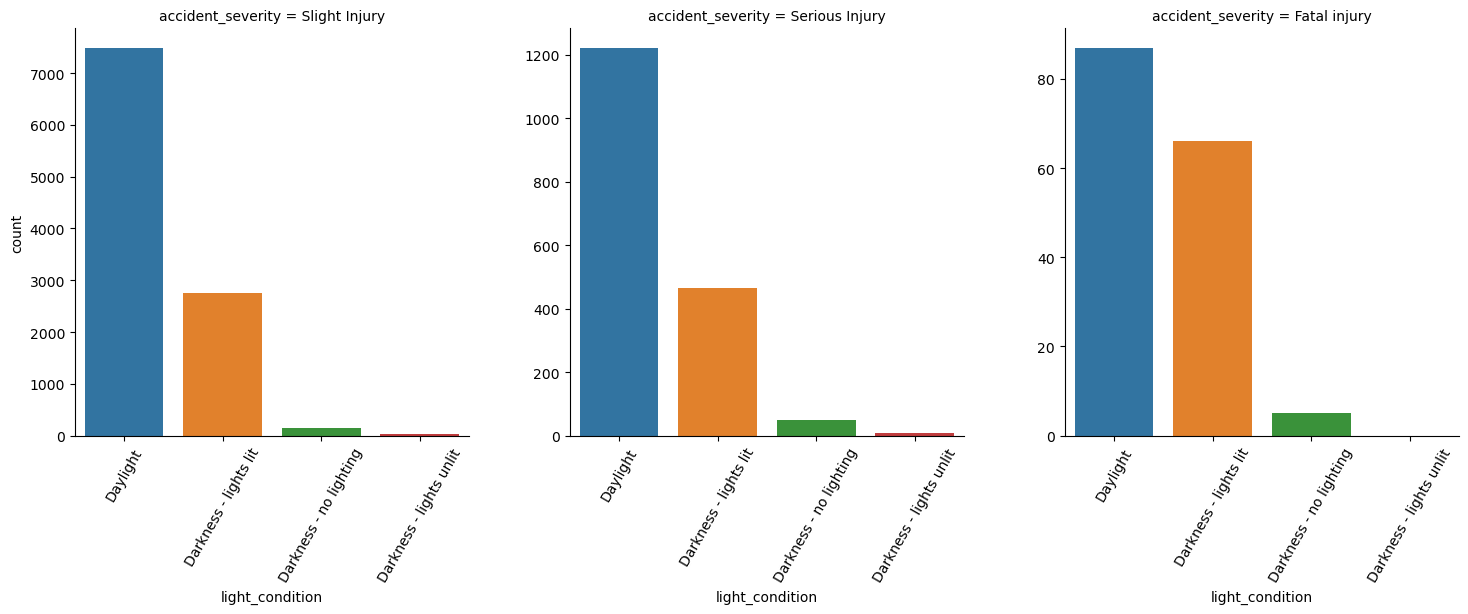

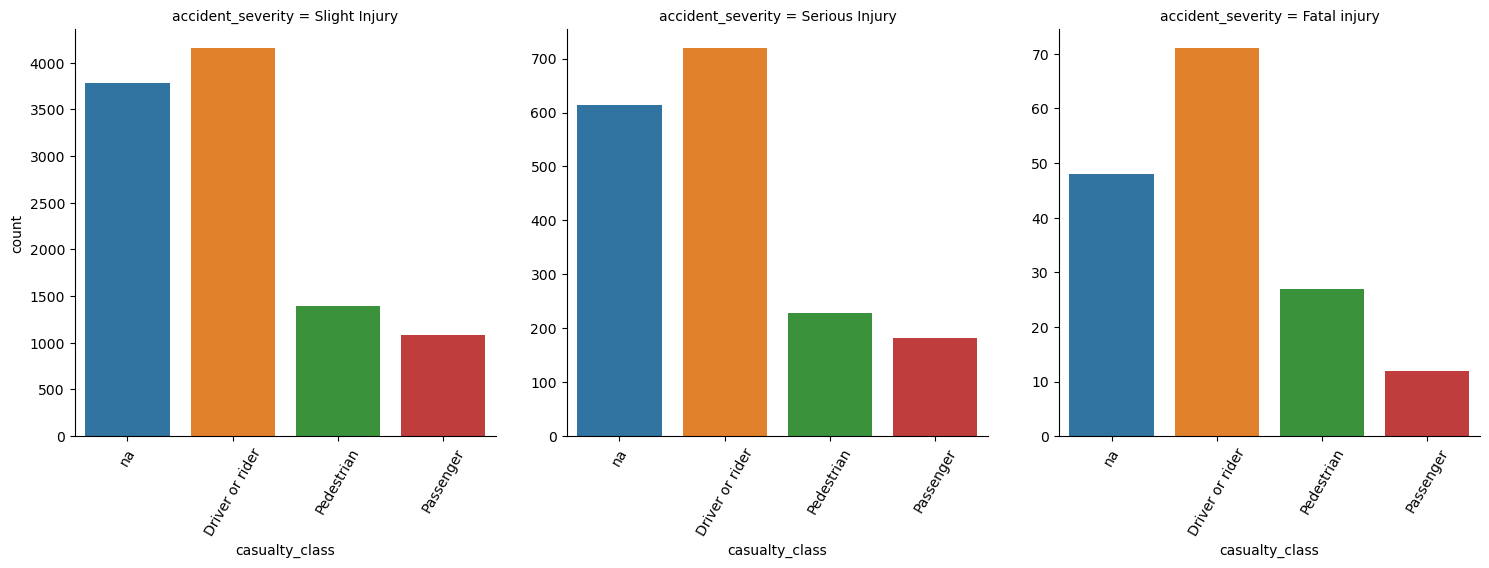

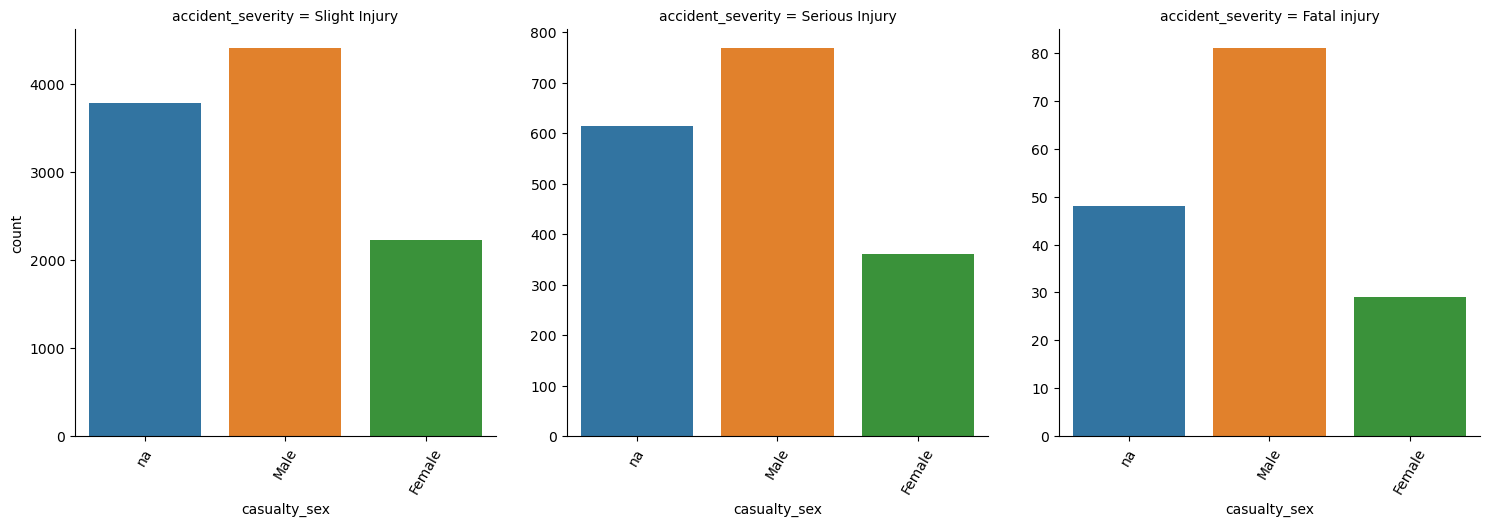

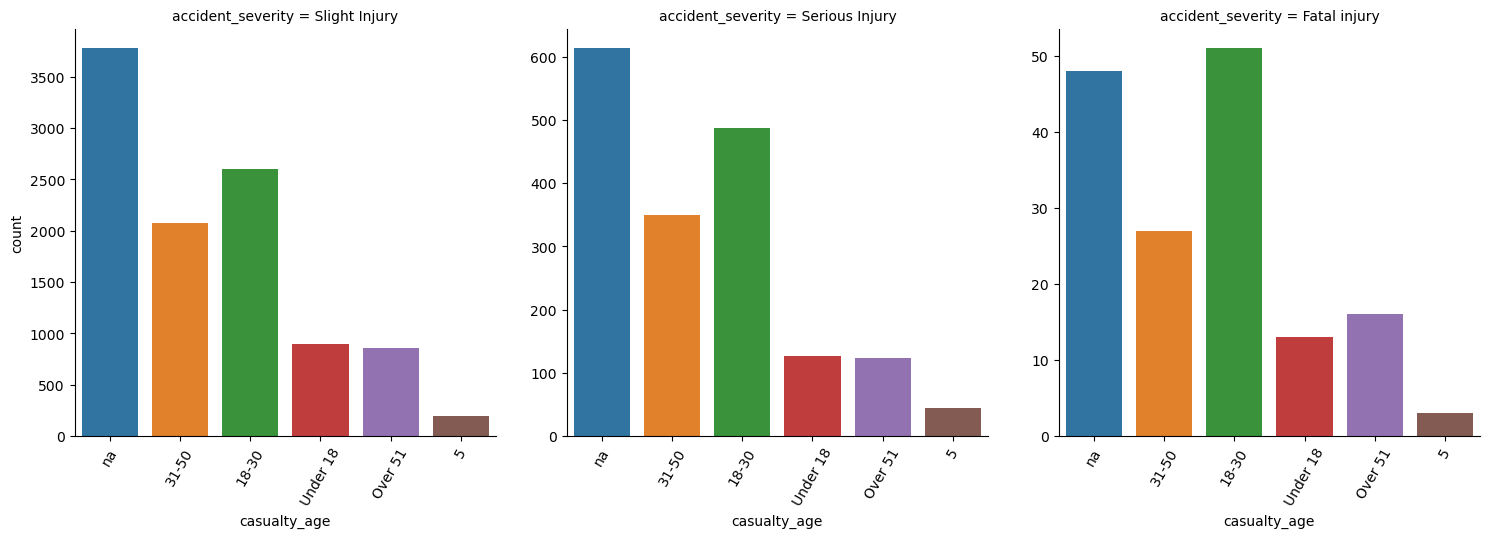

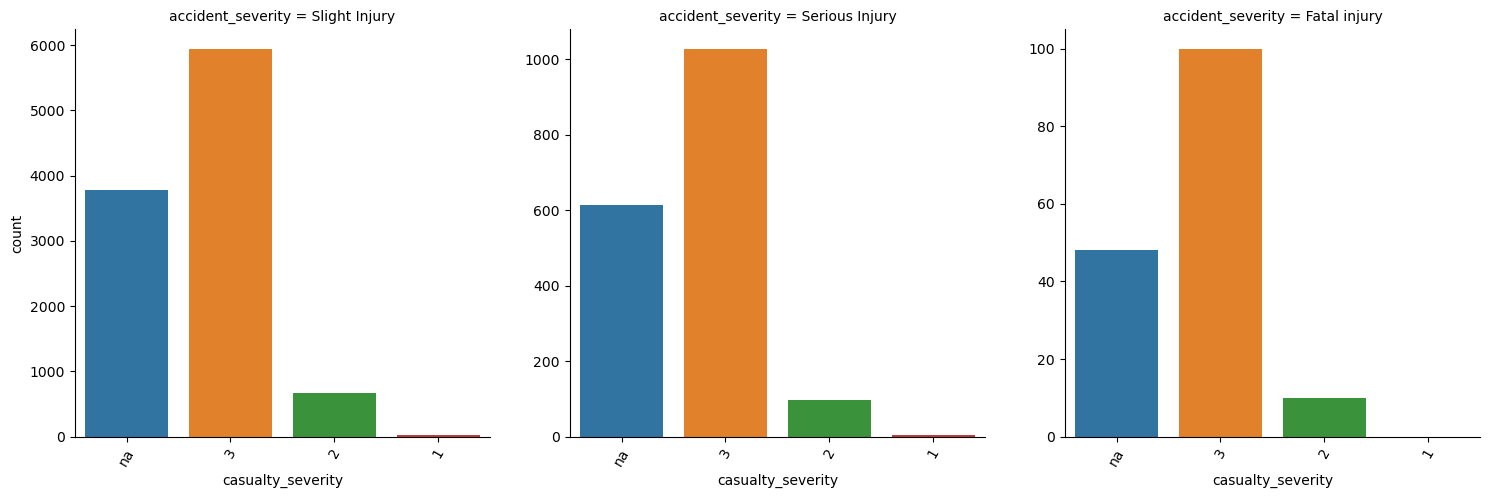

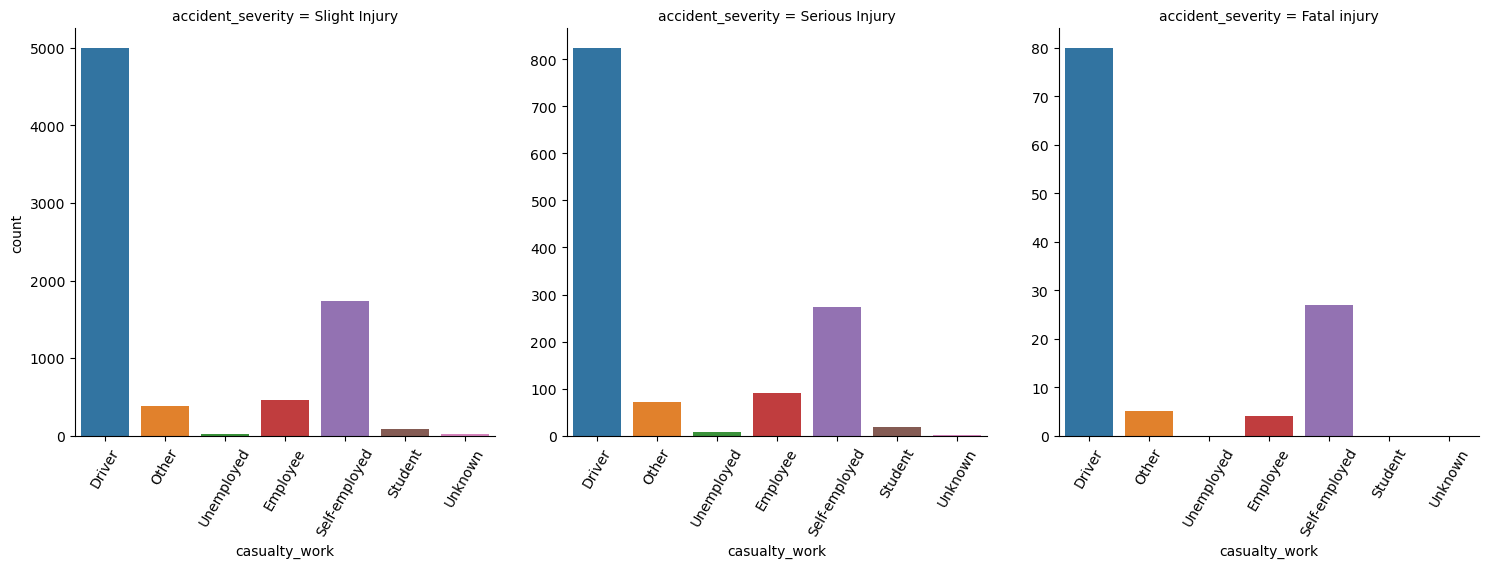

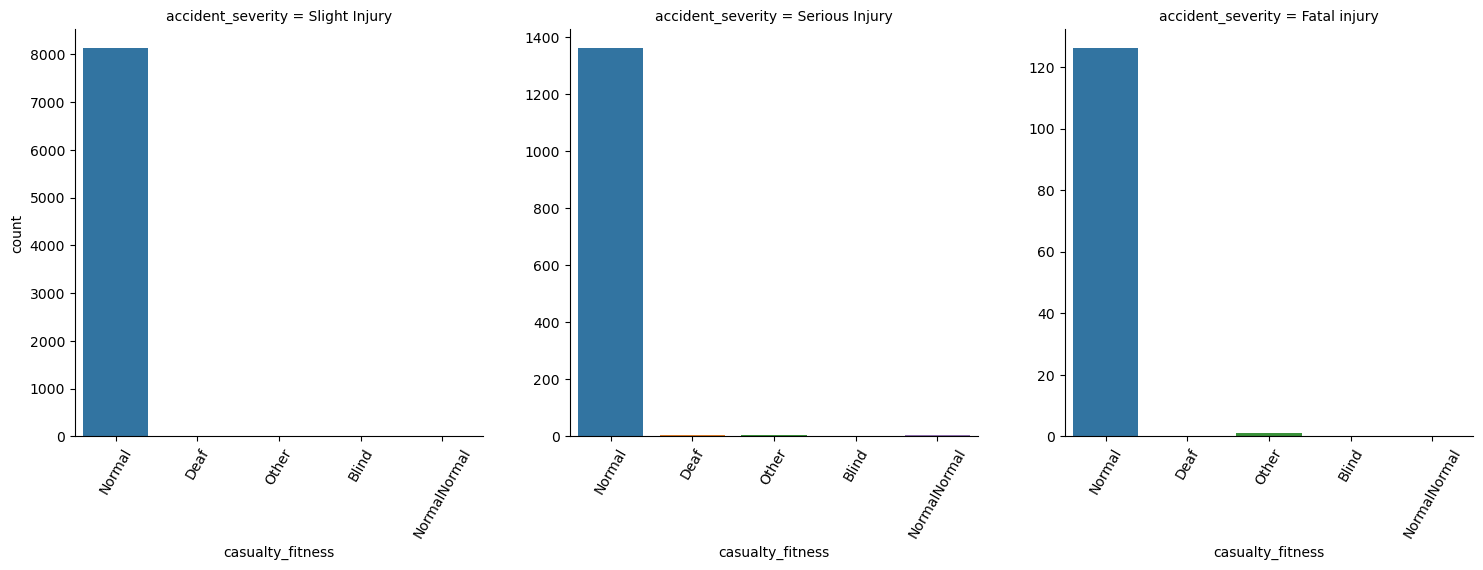

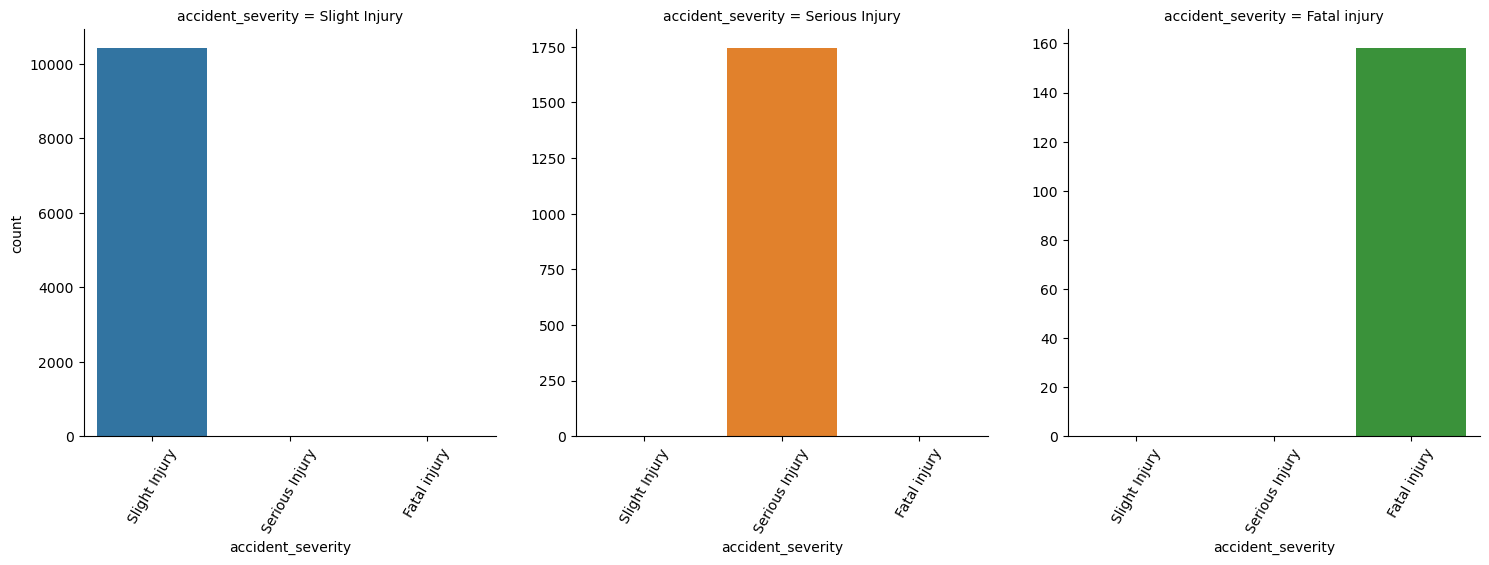

In [14]:
for col in rta.select_dtypes(include='object'):
    if rta[col].nunique() <= 8:
        g = sns.catplot(x = col, kind='count', col = 'accident_severity', data=rta, sharey=False)
        g.set_xticklabels(rotation=60)

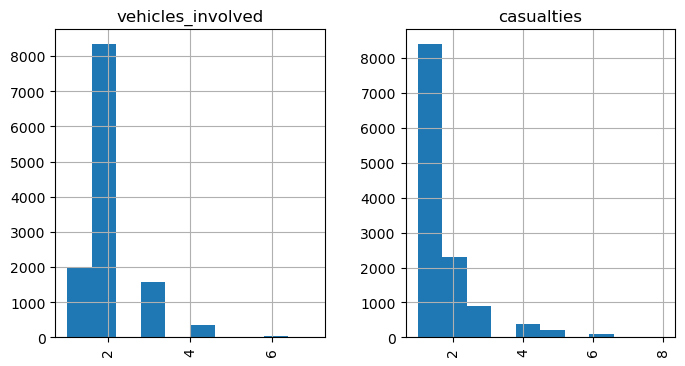

In [15]:
rta.hist(figsize=(8,4), xrot=90)
plt.show()

In [16]:
##Missing Values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
rta_missing= missing_values_table(rta)
rta_missing

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
vehicle_defect,4427,35.9
service_year,3928,31.9
casualty_work,3198,26.0
casualty_fitness,2635,21.4
vehicle_type,950,7.7
junction_type,887,7.2
driving_experience,829,6.7
educational_level,741,6.0
vehicle_driver_relation,579,4.7
vehicle_owner,482,3.9


In [18]:
corr = rta.corr()
corr

,vehicles_involved,casualties
vehicles_involved,1.000000,0.213427
casualties,0.213427,1.000000


In [19]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [20]:
rta['time'] = pd.to_datetime(rta['time'])

# date (day-month-year) time
rta["time"].dt.hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: time, Length: 12316, dtype: int64

In [21]:
#Analyzing time data

rta['hour'] = rta['time'].dt.hour
rta['minute'] = rta['time'].dt.minute
rta.drop('time', axis=1, inplace=True)

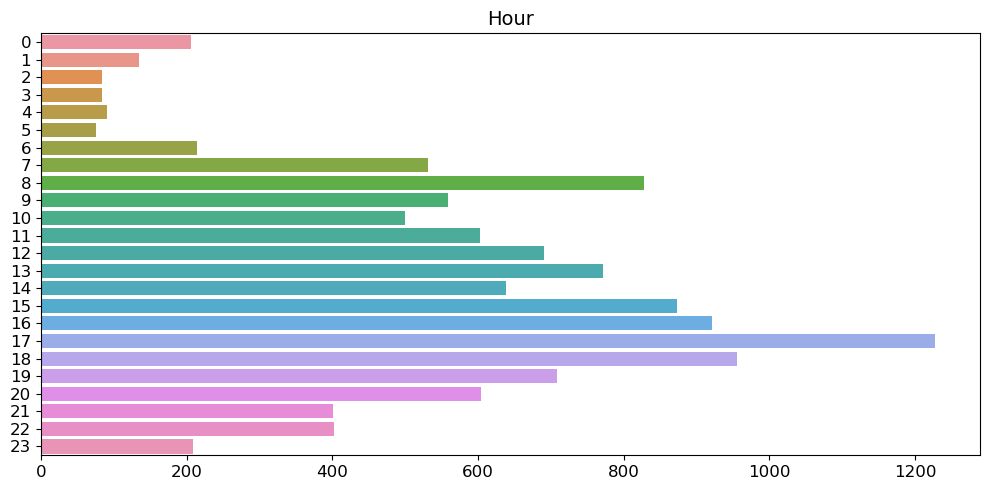

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

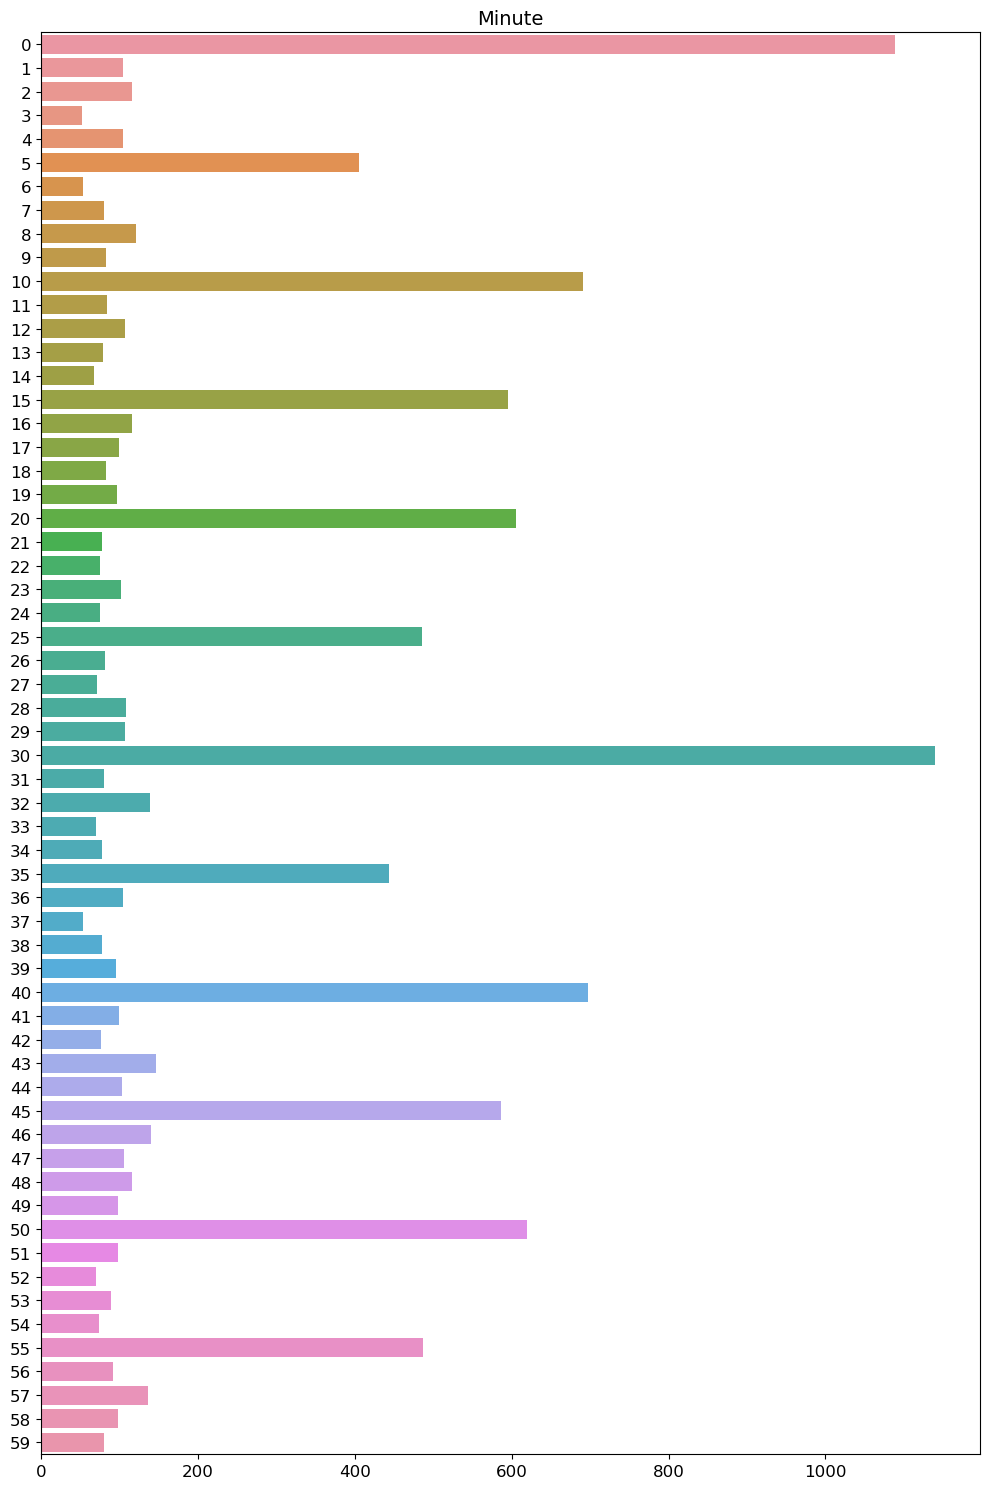

In [23]:
plt.figure(figsize=(10,15))
sns.countplot(data=rta, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [25]:
for col in rta.select_dtypes(include='object'):
    if rta[col].nunique() <=10:
        display(pd.crosstab(rta['accident_severity'], rta[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
accident_severity,,,,,,,
Fatal injury,0.101266,0.075949,0.234177,0.221519,0.139241,0.107595,0.120253
Serious Injury,0.179575,0.117040,0.140562,0.109007,0.156053,0.147447,0.150316
Slight Injury,0.164378,0.140663,0.132885,0.119251,0.149496,0.143639,0.149688


driver_age,18-30,31-50,Over 51,Under 18,Unknown
accident_severity,,,,,
Fatal injury,0.392405,0.341772,0.151899,0.075949,0.037975
Serious Injury,0.346529,0.310384,0.147447,0.096959,0.098680
Slight Injury,0.346135,0.335286,0.125204,0.061834,0.131541


driver_sex,Female,Male,Unknown
accident_severity,,,
Fatal injury,0.031646,0.962025,0.006329
Serious Injury,0.059667,0.930006,0.010327
Slight Injury,0.056841,0.927892,0.015266


educational_level,Above high school,Elementary school,High school,Illiterate,Junior high school,Unknown,Writing & reading
accident_severity,,,,,,,
Fatal injury,0.034722,0.166667,0.104167,0.000000,0.673611,0.000000,0.020833
Serious Injury,0.032238,0.190998,0.088808,0.003650,0.658759,0.012165,0.013382
Slight Injury,0.031062,0.186472,0.096965,0.003985,0.657914,0.008174,0.015429


vehicle_driver_relation,Employee,Other,Owner,Unknown
accident_severity,,,,
Fatal injury,0.765101,0.006711,0.228188,0.000000
Serious Injury,0.817963,0.008439,0.172996,0.000603
Slight Injury,0.821432,0.010877,0.166381,0.001309


driving_experience,1-2yr,2-5yr,5-10yr,Above 10yr,Below 1yr,No Licence,unknown
accident_severity,,,,,,,
Fatal injury,0.144828,0.317241,0.282759,0.200000,0.048276,0.000000,0.006897
Serious Injury,0.140741,0.235185,0.285185,0.199383,0.127778,0.008025,0.003704
Slight Injury,0.155009,0.224851,0.294178,0.196462,0.116026,0.010800,0.002674


vehicle_owner,Governmental,Organization,Other,Owner
accident_severity,,,,
Fatal injury,0.104575,0.026144,0.000000,0.869281
Serious Injury,0.078349,0.022727,0.000598,0.898325
Slight Injury,0.089320,0.026976,0.002098,0.881607


service_year,1-2yr,2-5yrs,5-10yrs,Above 10yr,Below 1yr,Unknown
accident_severity,,,,,,
Fatal injury,0.078261,0.243478,0.139130,0.104348,0.052174,0.382609
Serious Injury,0.093121,0.212248,0.160235,0.156040,0.036074,0.342282
Slight Injury,0.099845,0.213388,0.151532,0.159017,0.032905,0.343313


vehicle_defect,5,7,No defect
accident_severity,,,
Fatal injury,0.000000,0.000000,1.000000
Serious Injury,0.005240,0.012227,0.982533
Slight Injury,0.004519,0.009339,0.986142


lanes,Double carriageway (median),One way,Two-way (divided with broken lines road marking),Two-way (divided with solid lines road marking),Undivided Two way,Unknown,other
accident_severity,,,,,,,
Fatal injury,0.045752,0.078431,0.320261,0.006536,0.405229,0.000000,0.143791
Serious Injury,0.077876,0.067257,0.387021,0.012389,0.309145,0.003540,0.142773
Slight Injury,0.087375,0.071308,0.367549,0.011901,0.318358,0.005058,0.138451


road_allignment,Escarpments,Gentle horizontal curve,Sharp reverse curve,Steep grade downward with mountainous terrain,Steep grade upward with mountainous terrain,Tangent road with flat terrain,Tangent road with mild grade and flat terrain,Tangent road with mountainous terrain and,Tangent road with rolling terrain
accident_severity,,,,,,,,,
Fatal injury,0.006410,0.019231,0.000000,0.025641,0.006410,0.897436,0.012821,0.025641,0.006410
Serious Injury,0.008135,0.011621,0.005230,0.036607,0.002905,0.851830,0.044741,0.035445,0.003486
Slight Injury,0.009517,0.013596,0.004662,0.035156,0.001263,0.859765,0.040983,0.032145,0.002913


junction_type,Crossing,No junction,O Shape,Other,T Shape,Unknown,X Shape,Y Shape
accident_severity,,,,,,,,
Fatal injury,0.085106,0.503546,0.007092,0.014184,0.000000,0.014184,0.000000,0.375887
Serious Injury,0.153029,0.362898,0.016240,0.051843,0.004372,0.016240,0.000000,0.395378
Slight Injury,0.198204,0.328791,0.014143,0.037163,0.005471,0.016827,0.001239,0.398162


surface_type,Asphalt roads,Asphalt roads with some distress,Earth roads,Gravel roads,Other
accident_severity,,,,,
Fatal injury,0.942675,0.006369,0.044586,0.000000,0.006369
Serious Injury,0.926163,0.004070,0.028488,0.026163,0.015116
Slight Injury,0.930652,0.007110,0.029415,0.019188,0.013636


road_surface_conditions,Dry,Flood over 3cm. deep,Snow,Wet or damp
accident_severity,,,,
Fatal injury,0.765823,0.000000,0.000000,0.234177
Serious Injury,0.764200,0.000000,0.002295,0.233505
Slight Injury,0.757273,0.000192,0.006337,0.236198


light_condition,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
accident_severity,,,,
Fatal injury,0.417722,0.000000,0.031646,0.550633
Serious Injury,0.266781,0.004016,0.028112,0.701090
Slight Injury,0.264522,0.003169,0.013250,0.719059


weather_condition,Cloudy,Fog or mist,Normal,Other,Raining,Raining and Windy,Snow,Unknown,Windy
accident_severity,,,,,,,,,
Fatal injury,0.000000,0.000000,0.854430,0.000000,0.145570,0.000000,0.000000,0.00000,0.000000
Serious Injury,0.004590,0.000574,0.845668,0.016064,0.090648,0.001147,0.002869,0.02926,0.009180
Slight Injury,0.011234,0.000864,0.811714,0.025732,0.110418,0.003649,0.005377,0.02314,0.007873


collision_type,Collision with animals,Collision with pedestrians,Collision with roadside objects,Collision with roadside-parked vehicles,Fall from vehicles,Other,Rollover,Unknown,Vehicle with vehicle collision,With Train
accident_severity,,,,,,,,,,
Fatal injury,0.012821,0.141026,0.153846,0.000000,0.000000,0.000000,0.025641,0.000000,0.666667,0.000000
Serious Injury,0.015771,0.082360,0.158879,0.002921,0.002336,0.001752,0.031542,0.000584,0.702687,0.001168
Slight Injury,0.013796,0.071213,0.144759,0.004761,0.002915,0.002235,0.032935,0.001263,0.725444,0.000680


casualty_class,Driver or rider,Passenger,Pedestrian,na
accident_severity,,,,
Fatal injury,0.449367,0.075949,0.170886,0.303797
Serious Injury,0.412507,0.104418,0.130809,0.352266
Slight Injury,0.398848,0.104273,0.133845,0.363034


casualty_sex,Female,Male,na
accident_severity,,,
Fatal injury,0.183544,0.512658,0.303797
Serious Injury,0.207114,0.440620,0.352266
Slight Injury,0.214114,0.422852,0.363034


casualty_age,18-30,31-50,5,Over 51,Under 18,na
accident_severity,,,,,,
Fatal injury,0.322785,0.170886,0.018987,0.101266,0.082278,0.303797
Serious Injury,0.279403,0.200229,0.025244,0.070568,0.072289,0.352266
Slight Injury,0.250312,0.199616,0.018915,0.082093,0.086030,0.363034


casualty_severity,1,2,3,na
accident_severity,,,,
Fatal injury,0.000000,0.063291,0.632911,0.303797
Serious Injury,0.001721,0.056225,0.589788,0.352266
Slight Injury,0.002208,0.063658,0.571099,0.363034


casualty_work,Driver,Employee,Other,Self-employed,Student,Unemployed,Unknown
accident_severity,,,,,,,
Fatal injury,0.689655,0.034483,0.043103,0.232759,0.000000,0.000000,0.000000
Serious Injury,0.640249,0.069930,0.055167,0.212898,0.014763,0.005439,0.001554
Slight Injury,0.647959,0.059494,0.050162,0.225924,0.010888,0.003370,0.002203


casualty_fitness,Blind,Deaf,Normal,NormalNormal,Other
accident_severity,,,,,
Fatal injury,0.000000,0.000000,0.992126,0.000000,0.007874
Serious Injury,0.000728,0.002911,0.990539,0.002911,0.002911
Slight Injury,0.002078,0.001711,0.992787,0.001834,0.001589


pedestrian_movement,Crossing from driver's nearside,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Not a Pedestrian,Unknown or other,"Walking along in carriageway, back to traffic","Walking along in carriageway, facing traffic"
accident_severity,,,,,,,,,
Fatal injury,0.006329,0.044304,0.006329,0.000000,0.000000,0.898734,0.044304,0.000000,0.000000
Serious Injury,0.016064,0.029260,0.005737,0.002869,0.000000,0.921400,0.022949,0.001721,0.000000
Slight Injury,0.010658,0.026788,0.005857,0.003937,0.001248,0.925780,0.023620,0.001440,0.000672


accident_severity,Fatal injury,Serious Injury,Slight Injury
accident_severity,,,
Fatal injury,1.0,0.0,0.0
Serious Injury,0.0,1.0,0.0
Slight Injury,0.0,0.0,1.0


In [26]:
rta.duplicated().sum()

0

In [27]:
rta.nunique()

day_of_week                 7
driver_age                  5
driver_sex                  3
educational_level           7
vehicle_driver_relation     4
driving_experience          7
vehicle_type               17
vehicle_owner               4
service_year                6
vehicle_defect              3
accident_area              14
lanes                       7
road_allignment             9
junction_type               8
surface_type                5
road_surface_conditions     4
light_condition             4
weather_condition           9
collision_type             10
vehicles_involved           6
casualties                  8
vehicle_movement           13
casualty_class              4
casualty_sex                3
casualty_age                6
casualty_severity           4
casualty_work               7
casualty_fitness            5
pedestrian_movement         9
accident_cause             20
accident_severity           3
hour                       24
minute                     60
dtype: int

In [28]:
for i in rta.columns:
    print(f"Unique value in {i}:")
    print(rta[i].unique(),'\n')

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique value in vehicle_owner:
['Owner' 'Governmental' nan 'Organization' 'Other'] 

Unique value in serv

In [29]:
#EDA Insights

#Weekends top the trend in terms of accident occurence in all three categories (Saturday & Sunday)
#in terms of fatal injury, drivers with 2-5 years tops the list, followed by drivers with 5-10 years experience
#Places with no junction, Y shaped junction ares faces more accidents compared to other
#Drivers were higher in number in terms of casualty happenings
#Venhicle to vehicle collision tops the list in terms of types of collision occured
#18-30 Age group peoples tops the list in terms of casualty numbers
#3-5 PM is the time when the numbers of accidents peaks numerically


In [30]:
#Data Pre-processing
#Missing data strategy - dropping column with more missing, highly insignificant, cause high imbalance in dataset

#drop: defect of vehicle



In [31]:
rta_missing= missing_values_table(rta)
rta_missing

Your selected dataframe has 33 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
vehicle_defect,4427,35.9
service_year,3928,31.9
casualty_work,3198,26.0
casualty_fitness,2635,21.4
vehicle_type,950,7.7
junction_type,887,7.2
driving_experience,829,6.7
educational_level,741,6.0
vehicle_driver_relation,579,4.7
vehicle_owner,482,3.9


In [32]:
rta.isnull().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [33]:
# dropping columns that can cause imbalance while imputation
rta.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [34]:
# Identify columns with missing values
impute_cols = rta.columns[rta.isna().any()].tolist()

# Impute missing values with the mode
rta[impute_cols] = rta[impute_cols].fillna(rta.mode().iloc[0])

In [35]:
rta.isnull().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [36]:
rta.shape

(12316, 29)

In [39]:

from collections import Counter
from imblearn.over_sampling import SMOTE


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have a DataFrame 'df' with your data
# Replace 'target_column' with the name of your target column

# Identify numerical and categorical columns
numerical_columns = rta.select_dtypes(include=['number']).columns.tolist()
categorical_columns = rta.select_dtypes(include=['object', 'category']).columns.tolist()

# Create separate DataFrames for numerical and categorical columns
X_numerical = rta[numerical_columns]
X_categorical = rta[categorical_columns]
X_categorical = X_categorical.drop(['accident_severity'], axis=1)

# Extract the target variable
y = rta['accident_severity']  # Replace with the name of your target column

# Encode the categorical columns
encoder = OrdinalEncoder()
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=X_categorical.columns)

# Concatenate the encoded categorical columns with the numerical columns
X_encoded = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Encode the target variable 'y' using OrdinalEncoder
encoder_target = OrdinalEncoder()
y_encoded = encoder_target.fit_transform(y.values.reshape(-1, 1)).ravel()

X=X_encoded
y=y_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, and y_test are ready for your machine learning model


In [55]:
X_encoded.shape
X_encoded.head()
X.shape

(12316, 28)

In [56]:
y_encoded.shape
y.shape

(12316,)

In [57]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9852, 28) (2464, 28) (9852,) (2464,)


In [58]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2.0, n=8351 (84.76%)
Class= 1.0, n=1380 (14.01%)
Class= 0.0, n=121 (1.23%)
Class= 2.0, n=8351 (33.33%)
Class= 1.0, n=8351 (33.33%)
Class= 0.0, n=8351 (33.33%)
Upsampled data shape:  (25053, 28) (25053,)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a list of classifiers
classifiers = [
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Extra Trees Classifier", ExtraTreesClassifier())
]

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {round(accuracy, 2)}")
    print(f"Precision: {round(precision, 2)}")
    print(f"Recall: {round(recall, 2)}")
    print(f"F1 Score: {round(f1, 2)}")
    print(f"Confusion Matrix:\n{confusion}")
    print()


Classifier: Decision Tree Classifier
Accuracy: 0.75
Precision: 0.77
Recall: 0.75
F1 Score: 0.76
Confusion Matrix:
[[   8    4   25]
 [   5  126  232]
 [  43  310 1711]]

Classifier: Random Forest Classifier
Accuracy: 0.84
Precision: 0.77
Recall: 0.84
F1 Score: 0.78
Confusion Matrix:
[[   0    1   36]
 [   0   20  343]
 [   0   23 2041]]

Classifier: Extra Trees Classifier
Accuracy: 0.84
Precision: 0.81
Recall: 0.84
F1 Score: 0.78
Confusion Matrix:
[[   1    0   36]
 [   0   20  343]
 [   1   10 2053]]

Classifier: XGBoost Classifier
Accuracy: 0.84
Precision: 0.81
Recall: 0.84
F1 Score: 0.79
Confusion Matrix:
[[   1    0   36]
 [   0   42  321]
 [   1   29 2034]]

